# Elementary Education Early Intervention


Problem Statement:<br>
Students are taking three district standard thest every year. However, teachers tend to address issues that students may have towards the later part of the year (usually after the second test). Although this is helpful, it would be more useful if teachers could identify students in need of additional intervention at an earlier stage within the school year. My goal will be to use machine learning to help teachers identify which student needs early intervention after the first test (within the first marking period). This would allow teachers the ability to work with the students in problem areas in hopes of producing higher test scores.

# Import Libraries



In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

pd.set_option('display.max_columns', None)



## Group Functions

In [3]:
def  gender(biscayne, col):
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = plt.subplot(111)
    sns.countplot(x="Teacher", hue=col, data=biscayne)
    plt.legend(fontsize=10) # using a size in points
    plt.title(col)
    plt.show()

def q1(biscayne, col):
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = plt.subplot(111)
    sns.boxplot(x="Teacher", hue=col, data=biscayne)
    plt.legend(fontsize=10) # using a size in points
    plt.title(col)
    plt.show()

# FAST Test Scores
<img src="FAST.png" width ="500" />

# Data Ingestion


In [4]:
data = pd.read_excel("Biscayne Elementary Student Data.xlsx")
data

,Student Id,Gender,Tardies,Absence,Transfers,Suspended,ESE Primary Exceptionality,Teacher,Ethnicity,22/23 FAST PM3 Scale Score,22/23 FAST PM3 Achievement Level,23/24 FAST PM1 Scale Score,23/24 FAST PM1 Achievement Level,4th grade Number Routine Launch 1 Week 4\n,4th grade Number Routine Launch 1 Week 5\n,4th grade Number Routine Launch 1 Week 6\n,4th grade Number Routine Launch 1 Week 7\n,4th grade Number Routine Launch 1 Week 8\n,4th grade Number Routine Launch Q2 Week 1\n,4th grade Number Routine Launch Q2 Week 2\n,4th grade Number Routine Launch Q2 Week 3 and 4\n,4th grade Number Routine Launch Q2 Week 5\n,4th grade Number Routine Launch Q2 Week 6\n,Quarter 1 Grade,Quarter 2 Grade,23/24 FAST PM2 Scale Score,23/24 FAST PM2 Achievement Level,Quarter 3 Grade,Quarter 4 Grade,23/24 FAST PM3 Scale Score,23/24 FAST PM3 Achievement Level,Final Grade
0,20075802,M,1,26,N,0,Specific Learning Disability,Rogers,African American,NaN,NaN,155.0,1.0,NaN,NaN,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,0.6,0.61,155.0,1.0,0.6,0.62,172.0,1.0,61
1,20105857,M,0,1,N,0,?,Jenkins,African American,NaN,NaN,194.0,1.0,60.0,20.0,30.0,40.0,70.0,66.7,50.0,41.7,70.0,NaN,78.0,78.00,203.0,2.0,81.0,70.00,206.0,2.0,77
2,20142757,M,0,3,N,0,?,Queen,African American,219.0,4.0,213.0,3.0,80.0,90.0,90.0,100.0,90.0,91.7,66.7,83.3,80.0,72.7,91.0,87.00,222.0,4.0,90.0,90.00,238.0,5.0,90
3,20098882,F,1,9,N,0,?,Queen,African American,190.0,2.0,191.0,1.0,50.0,60.0,50.0,60.0,70.0,83.3,66.7,NaN,70.0,72.7,70.0,78.00,203.0,2.0,84.0,93.00,215.0,3.0,81
4,20169020,F,1,5,N,0,?,Rogers,African American,181.0,1.0,187.0,1.0,NaN,20.0,50.0,NaN,NaN,33.3,50.0,58.3,60.0,18.2,65.0,70.00,197.0,1.0,70.0,79.00,216.0,3.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,20078051,M,0,6,N,0,?,Jenkins,African American,206.0,3.0,199.0,1.0,60.0,90.0,60.0,80.0,60.0,83.3,66.7,91.7,100.0,NaN,88.0,89.00,219.0,3.0,86.0,87.00,225.0,4.0,88
120,20124967,F,0,6,N,0,?,Rogers,African American,NaN,NaN,177.0,1.0,70.0,10.0,30.0,70.0,60.0,58.3,58.3,41.7,60.0,18.2,77.0,70.00,195.0,1.0,72.0,83.00,211.0,3.0,76
121,20051569,F,2,6,N,0,?,Queen,African American,205.0,3.0,191.0,1.0,80.0,60.0,70.0,50.0,90.0,66.7,66.7,75.0,70.0,36.4,80.0,82.00,206.0,2.0,78.0,78.00,219.0,3.0,80
122,20195531,F,0,5,N,0,?,Jenkins,African American,190.0,2.0,180.0,1.0,70.0,60.0,80.0,90.0,90.0,75.0,50.0,58.3,70.0,54.5,90.0,90.00,210.0,2.0,92.0,81.00,222.0,4.0,88


Renaming columns to more user friendly names!

In [5]:
biscayne= data.copy()
biscayne

biscayne.rename(columns={'ESE Primary Exceptionality':'ESE Status', 
'22/23 FAST PM3 Scale Score':'Final third Grade FAST Score',
'22/23 FAST PM3 Achievement Level': 'Final third Grade FAST Level',
'23/24 FAST PM1 Scale Score': 'Fourth Grade Diagnostic FAST Scores', 
'23/24 FAST PM1 Achievement Level': 'Fourth Grade Diagnostic FAST Level', 
'4th grade Number Routine Launch 1 Week 4\n': 'Quarter 1 Week 4 Assessment', 
'4th grade Number Routine Launch 1 Week 5\n': 'Quarter 1 Week 5 Assessment', 
'4th grade Number Routine Launch 1 Week 6\n':'Quarter 1 Week 6 Assessment', 
'4th grade Number Routine Launch 1 Week 7\n':'Quarter 1 Week 7 Assessment',
'4th grade Number Routine Launch 1 Week 8\n': 'Quarter 1 Week 8 Assessment', 
'4th grade Number Routine Launch Q2 Week 1\n': 'Quarter 2 Week 1 Assessment', 
'4th grade Number Routine Launch Q2 Week 2\n': 'Quarter 2 Week 2 Assessment',
'4th grade Number Routine Launch Q2 Week 3 and 4\n': 'Quarter 2 Week 3 and 4 Assessment', 
'4th grade Number Routine Launch Q2 Week 5\n': 'Quarter 2 Week 5 Assessment',
'4th grade Number Routine Launch Q2 Week 6\n': 'Quarter 2 Week 6 Assessment', 
'23/24 FAST PM2 Achievement Level':'Fourth Grade mid-year FAST Level',
'23/24 FAST PM2 Scale Score' : 'Fourth Grade mid-year FAST Scores', 
'23/24 FAST PM3 Scale Score': 'Fourth Grade Final FAST Scores', 
'23/24 FAST PM3 Achievement Level': 'Fourth Grade Final FAST Level'}, inplace=True)

Verifing that all column name changes are correct.

In [6]:
biscayne.columns

Index(['Student Id', 'Gender', 'Tardies', 'Absence', 'Transfers', 'Suspended',
       'ESE Status', 'Teacher', 'Ethnicity', 'Final third Grade FAST Score',
       'Final third Grade FAST Level', 'Fourth Grade Diagnostic FAST Scores',
       'Fourth Grade Diagnostic FAST Level', 'Quarter 1 Week 4 Assessment',
       'Quarter 1 Week 5 Assessment', 'Quarter 1 Week 6 Assessment',
       'Quarter 1 Week 7 Assessment', 'Quarter 1 Week 8 Assessment',
       'Quarter 2 Week 1 Assessment', 'Quarter 2 Week 2 Assessment',
       'Quarter 2 Week 3 and 4 Assessment', 'Quarter 2 Week 5 Assessment',
       'Quarter 2 Week 6 Assessment', 'Quarter 1 Grade', 'Quarter 2 Grade',
       'Fourth Grade mid-year FAST Scores', 'Fourth Grade mid-year FAST Level',
       'Quarter 3 Grade', 'Quarter 4 Grade', 'Fourth Grade Final FAST Scores',
       'Fourth Grade Final FAST Level', 'Final Grade'],
      dtype='object')

# Analysis of the Data

In [7]:
biscayne.head()

,Student Id,Gender,Tardies,Absence,Transfers,Suspended,ESE Status,Teacher,Ethnicity,Final third Grade FAST Score,Final third Grade FAST Level,Fourth Grade Diagnostic FAST Scores,Fourth Grade Diagnostic FAST Level,Quarter 1 Week 4 Assessment,Quarter 1 Week 5 Assessment,Quarter 1 Week 6 Assessment,Quarter 1 Week 7 Assessment,Quarter 1 Week 8 Assessment,Quarter 2 Week 1 Assessment,Quarter 2 Week 2 Assessment,Quarter 2 Week 3 and 4 Assessment,Quarter 2 Week 5 Assessment,Quarter 2 Week 6 Assessment,Quarter 1 Grade,Quarter 2 Grade,Fourth Grade mid-year FAST Scores,Fourth Grade mid-year FAST Level,Quarter 3 Grade,Quarter 4 Grade,Fourth Grade Final FAST Scores,Fourth Grade Final FAST Level,Final Grade
0,20075802,M,1,26,N,0,Specific Learning Disability,Rogers,African American,NaN,NaN,155.0,1.0,NaN,NaN,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,0.6,0.61,155.0,1.0,0.6,0.62,172.0,1.0,61
1,20105857,M,0,1,N,0,?,Jenkins,African American,NaN,NaN,194.0,1.0,60.0,20.0,30.0,40.0,70.0,66.7,50.0,41.7,70.0,NaN,78.0,78.00,203.0,2.0,81.0,70.00,206.0,2.0,77
2,20142757,M,0,3,N,0,?,Queen,African American,219.0,4.0,213.0,3.0,80.0,90.0,90.0,100.0,90.0,91.7,66.7,83.3,80.0,72.7,91.0,87.00,222.0,4.0,90.0,90.00,238.0,5.0,90
3,20098882,F,1,9,N,0,?,Queen,African American,190.0,2.0,191.0,1.0,50.0,60.0,50.0,60.0,70.0,83.3,66.7,NaN,70.0,72.7,70.0,78.00,203.0,2.0,84.0,93.00,215.0,3.0,81
4,20169020,F,1,5,N,0,?,Rogers,African American,181.0,1.0,187.0,1.0,NaN,20.0,50.0,NaN,NaN,33.3,50.0,58.3,60.0,18.2,65.0,70.00,197.0,1.0,70.0,79.00,216.0,3.0,71


In [8]:
biscayne.describe()

,Student Id,Absence,Suspended,Final third Grade FAST Score,Final third Grade FAST Level,Fourth Grade Diagnostic FAST Scores,Fourth Grade Diagnostic FAST Level,Quarter 1 Week 4 Assessment,Quarter 1 Week 5 Assessment,Quarter 1 Week 6 Assessment,Quarter 1 Week 7 Assessment,Quarter 1 Week 8 Assessment,Quarter 2 Week 1 Assessment,Quarter 2 Week 2 Assessment,Quarter 2 Week 3 and 4 Assessment,Quarter 2 Week 5 Assessment,Quarter 2 Week 6 Assessment,Quarter 1 Grade,Quarter 2 Grade,Fourth Grade mid-year FAST Scores,Fourth Grade mid-year FAST Level,Quarter 3 Grade,Quarter 4 Grade,Fourth Grade Final FAST Scores,Fourth Grade Final FAST Level,Final Grade
count,1.240000e+02,124.000000,124.000000,108.000000,108.000000,117.000000,117.000000,101.000000,107.000000,106.000000,105.000000,101.000000,105.000000,101.000000,108.000000,101.000000,87.000000,109.000000,113.000000,120.000000,120.000000,121.000000,124.000000,123.000000,123.000000,124.000000
mean,1.955965e+07,7.564516,0.120968,198.916667,2.842593,187.504274,1.307692,66.237624,54.018692,55.566038,63.142857,70.198020,66.268571,62.877228,68.521296,78.118812,58.610345,80.390826,79.067345,203.983333,2.258333,79.690909,79.803387,214.528455,2.967480,80.040323
std,3.171163e+06,7.583939,0.832205,21.490761,1.185284,17.628163,0.622309,24.447965,29.742918,28.985388,27.185767,23.408554,23.070775,21.100620,22.103842,20.431000,22.965622,13.783280,13.839798,18.775535,1.118942,13.789730,14.020134,20.594972,1.279952,10.976989
min,0.000000e+00,0.000000,0.000000,140.000000,1.000000,155.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,16.700000,0.000000,10.000000,0.000000,0.600000,0.610000,155.000000,1.000000,0.600000,0.620000,155.000000,1.000000,54.000000
25%,2.008003e+07,2.750000,0.000000,190.000000,2.000000,178.000000,1.000000,50.000000,30.000000,30.000000,50.000000,60.000000,58.300000,50.000000,58.300000,70.000000,45.500000,74.000000,73.000000,196.000000,1.000000,72.000000,71.000000,205.000000,2.000000,72.000000
50%,2.010112e+07,6.000000,0.000000,202.000000,3.000000,191.000000,1.000000,70.000000,60.000000,60.000000,70.000000,80.000000,66.700000,66.700000,75.000000,80.000000,54.500000,83.000000,81.000000,206.000000,2.000000,82.000000,81.000000,217.000000,3.000000,81.000000
75%,2.011207e+07,9.000000,0.000000,214.250000,4.000000,199.000000,1.000000,80.000000,80.000000,80.000000,80.000000,90.000000,83.300000,75.000000,83.300000,90.000000,77.250000,91.000000,89.000000,216.250000,3.000000,89.000000,90.000000,226.500000,4.000000,88.000000
max,2.023824e+07,35.000000,9.000000,238.000000,5.000000,229.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.000000,97.000000,255.000000,5.000000,100.000000,101.000000,265.000000,5.000000,97.000000


In [9]:
biscayne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Student Id                           124 non-null    int64  
 1   Gender                               124 non-null    object 
 2   Tardies                              124 non-null    object 
 3   Absence                              124 non-null    int64  
 4   Transfers                            124 non-null    object 
 5   Suspended                            124 non-null    int64  
 6   ESE Status                           124 non-null    object 
 7   Teacher                              124 non-null    object 
 8   Ethnicity                            124 non-null    object 
 9   Final third Grade FAST Score         108 non-null    float64
 10  Final third Grade FAST Level         108 non-null    float64
 11  Fourth Grade Diagnostic FAST Sco

# Exploratory Data Analysis

## Missing Values

In [10]:
data.isnull().sum()

Student Id                                            0
Gender                                                0
Tardies                                               0
Absence                                               0
Transfers                                             0
Suspended                                             0
ESE Primary Exceptionality                            0
Teacher                                               0
Ethnicity                                             0
22/23 FAST PM3 Scale Score                           16
22/23 FAST PM3 Achievement Level                     16
23/24 FAST PM1 Scale Score                            7
23/24 FAST PM1 Achievement Level                      7
4th grade Number Routine Launch 1 Week 4\n           23
4th grade Number Routine Launch 1 Week 5\n           17
4th grade Number Routine Launch 1 Week 6\n           18
4th grade Number Routine Launch 1 Week 7\n           19
4th grade Number Routine Launch 1 Week 8\n      

Provide explanation, note the approach on missing  values

## Data Visualization

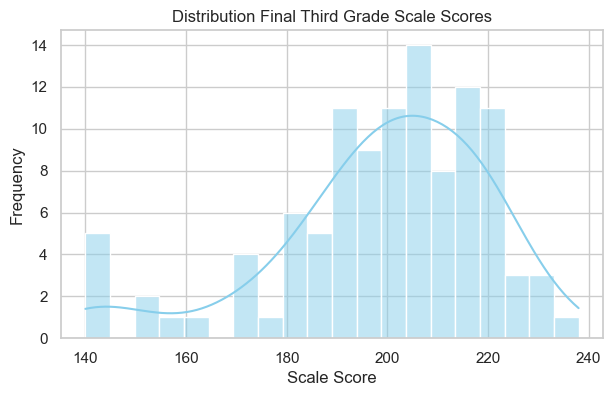

In [11]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 4))
sns.histplot(biscayne['Final third Grade FAST Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution Final Third Grade Scale Scores' )
plt.xlabel('Scale Score')
plt.ylabel('Frequency')
plt.show()

This data represents the final scale scores from the previous year. We see that the distribution is left skewed meaning that most of the activity seems to be taking place from 180-220. These values represent the final scores after all intervention strategies were implemented. It shows that average scores fall bewtween 200-210. Also seeing that 33% of the test takers scored a below a level 3 (140-197). We also see that 58% of the test takers scored at a level 3 or above (198-260).

<Axes: xlabel='Gender', ylabel='Final third Grade FAST Score'>

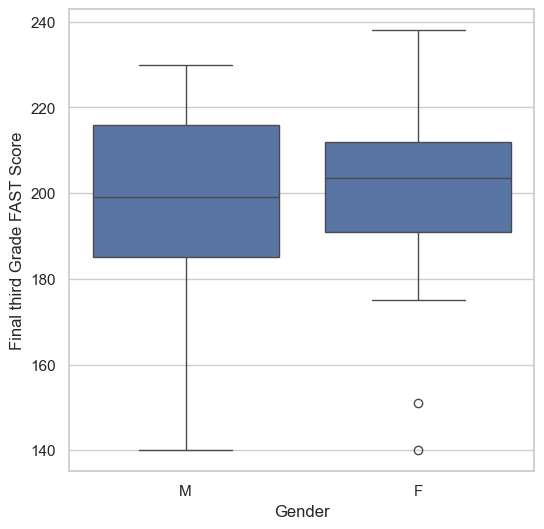

In [12]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sns.boxplot(x="Gender",y="Final third Grade FAST Score", data=biscayne)

We can see that the average FAST score for male students was about 198 which represents the low end of a level 3 (198 -260). We can also see that score ranges for male fall between 185(level 2) to 210 (level 3). WE can also see that  there are no outliers for the male students and the lowest score is 140 (low level 1). Finally we see the highest score for any male student was 230 which represents the hifher end of a level 3.

For female studnets we see that the average scores sits around 210 (mid level 3 range). We also notice a concentration of scores between 190-205 (all level 3 ranges)

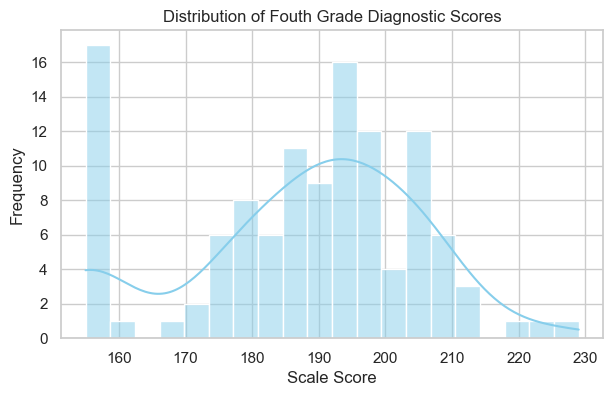

In [13]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7,4))
sns.histplot(biscayne['Fourth Grade Diagnostic FAST Scores'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Fouth Grade Diagnostic Scores' )
plt.xlabel('Scale Score')
plt.ylabel('Frequency')
plt.show()

Before interpreting this diagram it is important for us to know a few things.<br>
1. These are the same students from third grade but starting their fourth grade year<br>
2. This data represents skills from fourth grade content and only used to gauge readiness. <br>

Now after reviewing the data, we see that 43% of test takes scored below a level 1 (155-199). This makes sense as for many of these students this is their first time working with fourth grade concepts. This is also the begining of a new school year so students are comming for a long summer break. We also see that 5% of test takers scored above a level 3 on the diagnositc.

<Axes: xlabel='Gender', ylabel='Fourth Grade Diagnostic FAST Scores'>

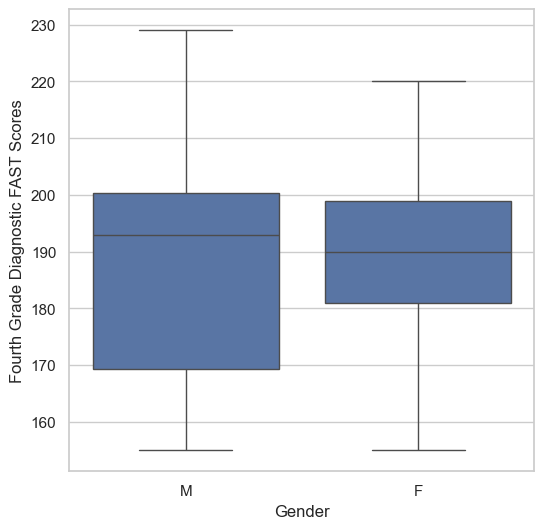

In [14]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sns.boxplot(x="Gender",y="Fourth Grade Diagnostic FAST Scores", data=biscayne) 

We now viewing the gender performance on the Fourth Grade Diagnostic Exam. One of the first things that we can see is that the young men on average are scoring lower than our female students. Yes we see that our meadian score for male students is roughly 195 compared to 190 for female students. However we see that the concentration of scores for male students range between 170-200 compared to our female students range of scores of 180-195. This simply means that as a population, female students perform better on the diagnostic compared to male students.

In [15]:
print("Number of Female Students:",biscayne['Gender'].tolist().count('F'))
print("Number of Male Students:",biscayne['Gender'].tolist().count('M'))

Number of Female Students: 69
Number of Male Students: 55


This is a breakdown of the number of fourth grade male and female students.

In [16]:
gender_performance=['Gender', 'Fourth Grade Diagnostic FAST Level','Fourth Grade mid-year FAST Level','Fourth Grade Final FAST Level' ]

I'm creating a list of categorical features that I would like to see compared. The goal here is to see how students performed on all three exams based on their gender and assigned teacher.

Add additiona test to this list

column name: Gender


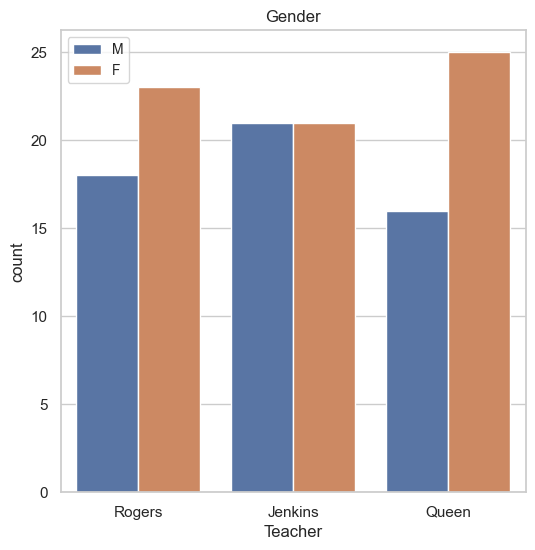

column name: Fourth Grade Diagnostic FAST Level


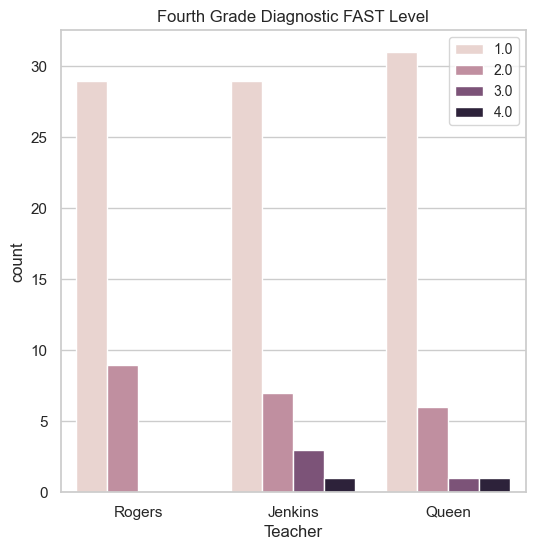

column name: Fourth Grade mid-year FAST Level


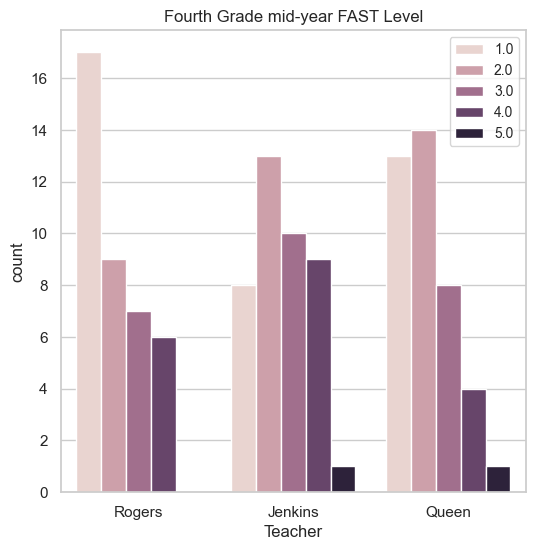

column name: Fourth Grade Final FAST Level


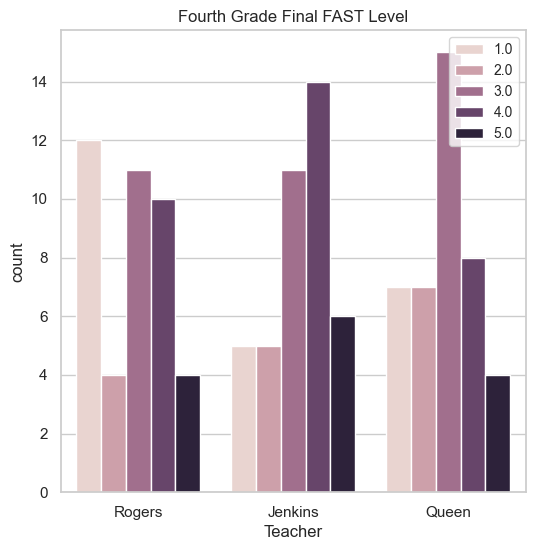

In [17]:
for i in gender_performance:
    print("column name:", i)
    gender(biscayne, i)
    

<Axes: xlabel='Teacher', ylabel='Fourth Grade Final FAST Scores'>

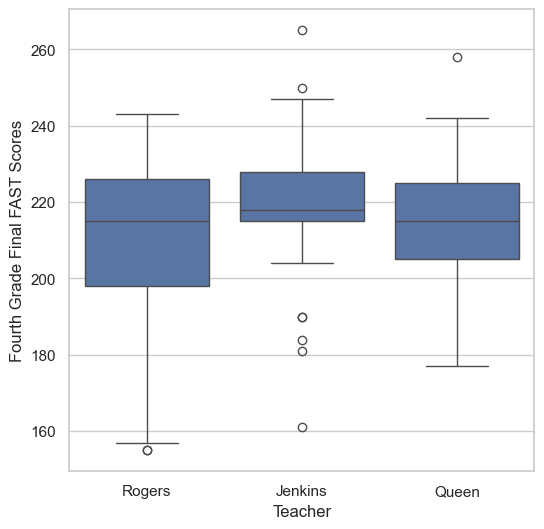

In [18]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sns.boxplot(x='Teacher', y='Fourth Grade Final FAST Scores', data=biscayne)

Go back to fix function for this 

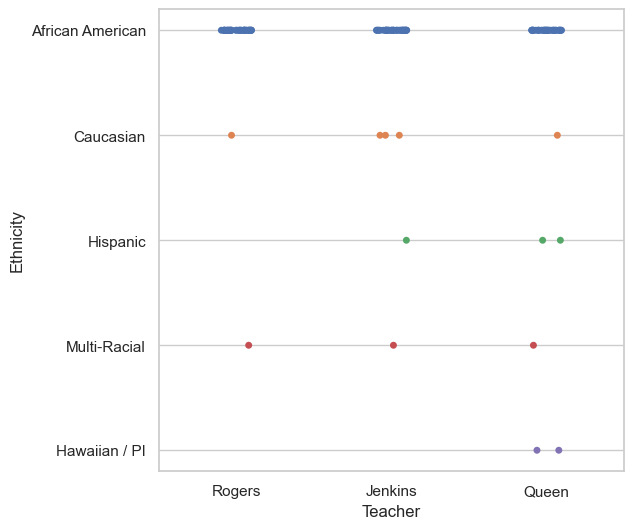

In [19]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sns.stripplot(data=biscayne,x='Teacher', y='Ethnicity', hue='Ethnicity')
sns.set(font_scale=1)
plt.legend([],[], frameon=False)
plt.show()

We are viewing the ethnic breakdown of students by assigned teacher. Overall we see that there are more African American students in each class. We can also see that Mr. Rogers has the least diverse class compared to both Ms. Jenkins and Ms. Queen. Finally we can see that Ms. Queen has the most diverse class of all three teachers.

Both of these graphs show that there aren't any male students currently labeled "Gifted" an in of the teachers class. We can however see that are a femal gifted students and each class.

In [20]:
biscayne['ESE Status'].value_counts()

ESE Status
?                               101
Specific Learning Disability      5
Speech Impaired                   5
Gifted                            5
Other Health Impaired             3
Autistic Spectrum Disorders       2
Intellectual Disabilities         1
Deaf/Hard of Hearing              1
Language Impaired                 1
Name: count, dtype: int64

In [21]:
biscayne['Ethnicity'].value_counts()

Ethnicity
African American    111
Caucasian             5
Hispanic              3
Multi-Racial          3
Hawaiian / PI         2
Name: count, dtype: int64

This is a breakdown of all fourth grade students and their ESE status. As we can see there are only 5 gifted students which represents about 4% of the Fourth grade poupulation (not much). I will use a label encoder to address "?" which represents students that don't have an ESE label/status.

## Corelation Analysis


In [22]:
correlation=biscayne.select_dtypes(include=np.number)
test=correlation.corr()
mid_correlations = test["Fourth Grade mid-year FAST Scores"].sort_values(ascending=False)
mid_correlations

Fourth Grade mid-year FAST Scores      1.000000
Fourth Grade Final FAST Scores         0.892612
Final Grade                            0.871930
Fourth Grade mid-year FAST Level       0.868193
Final third Grade FAST Score           0.864992
Fourth Grade Final FAST Level          0.859366
Fourth Grade Diagnostic FAST Scores    0.854953
Final third Grade FAST Level           0.844200
Quarter 3 Grade                        0.807307
Quarter 1 Week 6 Assessment            0.805848
Quarter 1 Grade                        0.794215
Quarter 4 Grade                        0.790344
Quarter 1 Week 4 Assessment            0.787966
Quarter 1 Week 5 Assessment            0.771432
Quarter 2 Grade                        0.770083
Quarter 2 Week 1 Assessment            0.739989
Quarter 1 Week 7 Assessment            0.725040
Quarter 2 Week 2 Assessment            0.665450
Quarter 2 Week 6 Assessment            0.653980
Quarter 2 Week 5 Assessment            0.638198
Quarter 1 Week 8 Assessment            0

In reviewing the data, we see that there a strong correlation between mid-year and final test scores. It also indicates that the performance on the mid-year exam is a direct indication on how the student may perform on the final exam. This is a plus because our goal with this project is to predict mid-year scores as the target and for that reason don't see a need to keep final scores so those will be removed from the dataset.

In the same line of thougt, we are ignoring any assessment that happens after the mid-year Fast assesment has been completed. Again, these assessments don't allow or aid in predicting the target which in this case is the Mid-year assessment. The next assessment with strong correlation would be the diagnositc exam. We can also see that quarter 1 assessments have a strong correlation on how a student will perform on the exam. Finally, we see that things like attendance don't have any real correlation so it will be removed along with suspension. Although student id doesn't show strong correlation, we will keep this as this the only we can identify students within the data set.





## Data Preprocessing

1. Duplicate Values
2. Missing Value Treatment
3. Outliers Detection (Treatment)
4. Feature Engineering
5. Data preprocessing for model training 
6. Dropped Columns
7. Encoding (Label & One Hot)


In [23]:
#Duplicate Values looks at row level data
biscayne.duplicated().sum()

np.int64(0)

This shows that there are no duplicate values within the dataset. So this a problem 

In [24]:
#Missing Value
biscayne.isnull().sum()

Student Id                              0
Gender                                  0
Tardies                                 0
Absence                                 0
Transfers                               0
Suspended                               0
ESE Status                              0
Teacher                                 0
Ethnicity                               0
Final third Grade FAST Score           16
Final third Grade FAST Level           16
Fourth Grade Diagnostic FAST Scores     7
Fourth Grade Diagnostic FAST Level      7
Quarter 1 Week 4 Assessment            23
Quarter 1 Week 5 Assessment            17
Quarter 1 Week 6 Assessment            18
Quarter 1 Week 7 Assessment            19
Quarter 1 Week 8 Assessment            23
Quarter 2 Week 1 Assessment            19
Quarter 2 Week 2 Assessment            23
Quarter 2 Week 3 and 4 Assessment      16
Quarter 2 Week 5 Assessment            23
Quarter 2 Week 6 Assessment            37
Quarter 1 Grade                   

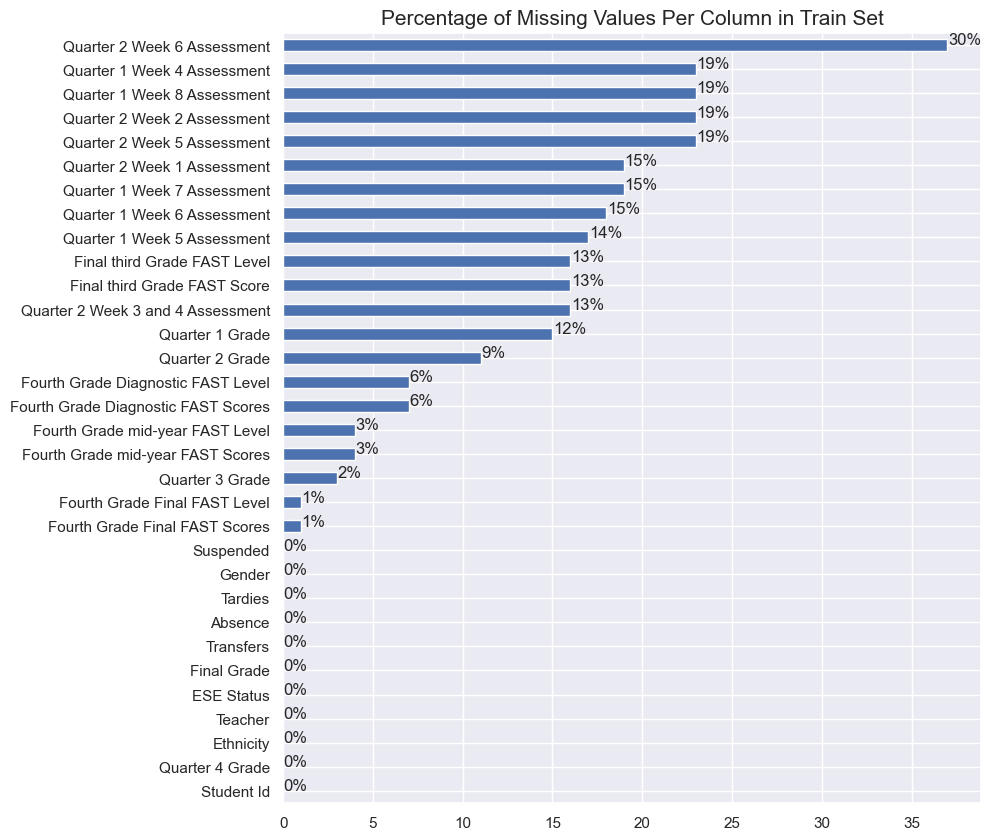

In [25]:
# Check if there any missing values in train set
ax = biscayne.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/biscayne.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x, y))


In looking at the correlation and some of these missing value I've decided to remove certain features. The first set of features that will be ignored are those scores and grades that happen after mid-year assessment as the cannot be used to determine impact on the mid-year scores.

We also see, that Quarter 2 week 6 assessment show is missing 30% of the data. For that reason it would make sense to remove this column from our dataset. We will keep anything that has less than 20% null values and remove anything larger than 20%. For that reason, it will make sense to implement tactics where we replace missing or null values for the remaining columns.



We are now going to identify the mean of all numerical columns. This should provide mean values that we will later use to replace null or missing values.

In [26]:
biscayne.select_dtypes(include=np.number).describe()

,Student Id,Absence,Suspended,Final third Grade FAST Score,Final third Grade FAST Level,Fourth Grade Diagnostic FAST Scores,Fourth Grade Diagnostic FAST Level,Quarter 1 Week 4 Assessment,Quarter 1 Week 5 Assessment,Quarter 1 Week 6 Assessment,Quarter 1 Week 7 Assessment,Quarter 1 Week 8 Assessment,Quarter 2 Week 1 Assessment,Quarter 2 Week 2 Assessment,Quarter 2 Week 3 and 4 Assessment,Quarter 2 Week 5 Assessment,Quarter 2 Week 6 Assessment,Quarter 1 Grade,Quarter 2 Grade,Fourth Grade mid-year FAST Scores,Fourth Grade mid-year FAST Level,Quarter 3 Grade,Quarter 4 Grade,Fourth Grade Final FAST Scores,Fourth Grade Final FAST Level,Final Grade
count,1.240000e+02,124.000000,124.000000,108.000000,108.000000,117.000000,117.000000,101.000000,107.000000,106.000000,105.000000,101.000000,105.000000,101.000000,108.000000,101.000000,87.000000,109.000000,113.000000,120.000000,120.000000,121.000000,124.000000,123.000000,123.000000,124.000000
mean,1.955965e+07,7.564516,0.120968,198.916667,2.842593,187.504274,1.307692,66.237624,54.018692,55.566038,63.142857,70.198020,66.268571,62.877228,68.521296,78.118812,58.610345,80.390826,79.067345,203.983333,2.258333,79.690909,79.803387,214.528455,2.967480,80.040323
std,3.171163e+06,7.583939,0.832205,21.490761,1.185284,17.628163,0.622309,24.447965,29.742918,28.985388,27.185767,23.408554,23.070775,21.100620,22.103842,20.431000,22.965622,13.783280,13.839798,18.775535,1.118942,13.789730,14.020134,20.594972,1.279952,10.976989
min,0.000000e+00,0.000000,0.000000,140.000000,1.000000,155.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,16.700000,0.000000,10.000000,0.000000,0.600000,0.610000,155.000000,1.000000,0.600000,0.620000,155.000000,1.000000,54.000000
25%,2.008003e+07,2.750000,0.000000,190.000000,2.000000,178.000000,1.000000,50.000000,30.000000,30.000000,50.000000,60.000000,58.300000,50.000000,58.300000,70.000000,45.500000,74.000000,73.000000,196.000000,1.000000,72.000000,71.000000,205.000000,2.000000,72.000000
50%,2.010112e+07,6.000000,0.000000,202.000000,3.000000,191.000000,1.000000,70.000000,60.000000,60.000000,70.000000,80.000000,66.700000,66.700000,75.000000,80.000000,54.500000,83.000000,81.000000,206.000000,2.000000,82.000000,81.000000,217.000000,3.000000,81.000000
75%,2.011207e+07,9.000000,0.000000,214.250000,4.000000,199.000000,1.000000,80.000000,80.000000,80.000000,80.000000,90.000000,83.300000,75.000000,83.300000,90.000000,77.250000,91.000000,89.000000,216.250000,3.000000,89.000000,90.000000,226.500000,4.000000,88.000000
max,2.023824e+07,35.000000,9.000000,238.000000,5.000000,229.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.000000,97.000000,255.000000,5.000000,100.000000,101.000000,265.000000,5.000000,97.000000


In [27]:
biscayne['Quarter 1 Grade'].mean()

np.float64(80.39082568807339)

In [28]:
biscayne['Quarter 1 Grade'].fillna(biscayne['Quarter 1 Grade'].mean())


0       0.6
1      78.0
2      91.0
3      70.0
4      65.0
       ... 
119    88.0
120    77.0
121    80.0
122    90.0
123    77.0
Name: Quarter 1 Grade, Length: 124, dtype: float64

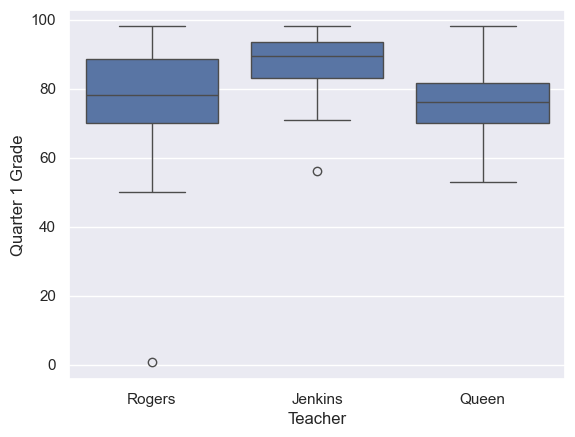

In [29]:

sns.boxplot(x="Teacher", y= "Quarter 1 Grade", data=biscayne)
plt.show()

In [30]:
# Task: Impute grade column

In [31]:
biscayne['Quarter 1 Grade'].fillna(method="bfill", axis=0) #Work on the ffill abd bfill and compare

/var/folders/nj/0krvmg0j6vl68z56q4bhsj6w0000gn/T/ipykernel_31922/579319799.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  biscayne['Quarter 1 Grade'].fillna(method="bfill", axis=0) #Work on the ffill abd bfill and compare


0       0.6
1      78.0
2      91.0
3      70.0
4      65.0
       ... 
119    88.0
120    77.0
121    80.0
122    90.0
123    77.0
Name: Quarter 1 Grade, Length: 124, dtype: float64

In [32]:
Q1= biscayne['Quarter 1 Grade'].quantile(0.25)
Q2 =biscayne['Quarter 1 Grade'].quantile(0.50)
Q3 =biscayne['Quarter 1 Grade'].quantile(0.75)

In [33]:
print(f"Q1:{Q1}\n Q2:{Q2}\n Q3:{Q3}")

Q1:74.0
 Q2:83.0
 Q3:91.0


In [34]:
IQR =Q3-Q1
lower =Q1-1.5*IQR


In [35]:
lower

np.float64(48.5)

In [36]:
upper = Q3 +1.5*IQR
upper

np.float64(116.5)

In [37]:
biscayne[biscayne['Quarter 1 Grade']<lower]

,Student Id,Gender,Tardies,Absence,Transfers,Suspended,ESE Status,Teacher,Ethnicity,Final third Grade FAST Score,Final third Grade FAST Level,Fourth Grade Diagnostic FAST Scores,Fourth Grade Diagnostic FAST Level,Quarter 1 Week 4 Assessment,Quarter 1 Week 5 Assessment,Quarter 1 Week 6 Assessment,Quarter 1 Week 7 Assessment,Quarter 1 Week 8 Assessment,Quarter 2 Week 1 Assessment,Quarter 2 Week 2 Assessment,Quarter 2 Week 3 and 4 Assessment,Quarter 2 Week 5 Assessment,Quarter 2 Week 6 Assessment,Quarter 1 Grade,Quarter 2 Grade,Fourth Grade mid-year FAST Scores,Fourth Grade mid-year FAST Level,Quarter 3 Grade,Quarter 4 Grade,Fourth Grade Final FAST Scores,Fourth Grade Final FAST Level,Final Grade
0,20075802,M,1,26,N,0,Specific Learning Disability,Rogers,African American,NaN,NaN,155.0,1.0,NaN,NaN,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,0.6,0.61,155.0,1.0,0.6,0.62,172.0,1.0,61


In [38]:
biscayne[biscayne['Quarter 1 Grade']>upper]

,Student Id,Gender,Tardies,Absence,Transfers,Suspended,ESE Status,Teacher,Ethnicity,Final third Grade FAST Score,Final third Grade FAST Level,Fourth Grade Diagnostic FAST Scores,Fourth Grade Diagnostic FAST Level,Quarter 1 Week 4 Assessment,Quarter 1 Week 5 Assessment,Quarter 1 Week 6 Assessment,Quarter 1 Week 7 Assessment,Quarter 1 Week 8 Assessment,Quarter 2 Week 1 Assessment,Quarter 2 Week 2 Assessment,Quarter 2 Week 3 and 4 Assessment,Quarter 2 Week 5 Assessment,Quarter 2 Week 6 Assessment,Quarter 1 Grade,Quarter 2 Grade,Fourth Grade mid-year FAST Scores,Fourth Grade mid-year FAST Level,Quarter 3 Grade,Quarter 4 Grade,Fourth Grade Final FAST Scores,Fourth Grade Final FAST Level,Final Grade


## Dealing with Missing Values

In [39]:
teacher_group =biscayne[['Teacher', 'Final third Grade FAST Score', 'Fourth Grade Diagnostic FAST Scores','Quarter 1 Week 4 Assessment',
                         'Quarter 1 Week 5 Assessment', 'Quarter 1 Week 6 Assessment', 'Quarter 1 Week 7 Assessment',
                         'Quarter 1 Week 8 Assessment', 'Quarter 2 Week 1 Assessment', 'Quarter 2 Week 2 Assessment',
                         'Quarter 2 Week 3 and 4 Assessment', 'Quarter 2 Week 5 Assessment', 'Quarter 1 Grade', 'Quarter 2 Grade']].groupby("Teacher")


The idea here is group all values by teacher, from there I will take the mean of each numerical column. The logic is this, I can choose to take the mean of each column then replace that the nulls in each column with the column mean. However, this mean would be the mean of all students. A more accurate approach is to take the mean for each class use those means accordingly. The mean value for Mr. Roger's class isn't the same as the mean for Ms. Jenkins class however the teacher's mean would be more accurate to use for any student in that teacher's class. Using the groupby method to accomplish this.

In [40]:
teacher_group.sum()

,Final third Grade FAST Score,Fourth Grade Diagnostic FAST Scores,Quarter 1 Week 4 Assessment,Quarter 1 Week 5 Assessment,Quarter 1 Week 6 Assessment,Quarter 1 Week 7 Assessment,Quarter 1 Week 8 Assessment,Quarter 2 Week 1 Assessment,Quarter 2 Week 2 Assessment,Quarter 2 Week 3 and 4 Assessment,Quarter 2 Week 5 Assessment,Quarter 1 Grade,Quarter 2 Grade
Teacher,,,,,,,,,,,,,
Jenkins,7747.0,7646.0,2670.0,2440.0,2260.0,2590.0,2760.0,2708.3,2342.0,2766.7,2960.0,3324.0,3336.00
Queen,7131.0,7340.0,2290.0,1740.0,1940.0,2070.0,2410.0,2241.7,1983.6,2525.1,2730.0,2737.0,2823.00
Rogers,6605.0,6952.0,1730.0,1600.0,1690.0,1970.0,1920.0,2008.2,2025.0,2108.5,2200.0,2701.6,2775.61


In [41]:
teacher_group.mean()

,Final third Grade FAST Score,Fourth Grade Diagnostic FAST Scores,Quarter 1 Week 4 Assessment,Quarter 1 Week 5 Assessment,Quarter 1 Week 6 Assessment,Quarter 1 Week 7 Assessment,Quarter 1 Week 8 Assessment,Quarter 2 Week 1 Assessment,Quarter 2 Week 2 Assessment,Quarter 2 Week 3 and 4 Assessment,Quarter 2 Week 5 Assessment,Quarter 1 Grade,Quarter 2 Grade
Teacher,,,,,,,,,,,,,
Jenkins,203.868421,191.150000,70.263158,65.945946,62.777778,70.0000,76.666667,73.197297,66.914286,70.941026,87.058824,87.473684,85.538462
Queen,198.083333,188.205128,65.428571,48.333333,53.888889,57.5000,68.857143,64.048571,56.674286,70.141667,73.783784,76.027778,76.297297
Rogers,194.264706,182.947368,61.785714,47.058824,49.705882,61.5625,64.000000,60.854545,65.322581,63.893939,73.333333,77.188571,75.016486


In [42]:
teacher_group.mean()['Final third Grade FAST Score'][0]

/var/folders/nj/0krvmg0j6vl68z56q4bhsj6w0000gn/T/ipykernel_31922/232262700.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  teacher_group.mean()['Final third Grade FAST Score'][0]


np.float64(203.8684210526316)

We can now see the mean for each teacher and the respective tests/assignments. 

In [43]:
data_set_mean= round(biscayne['Fourth Grade Diagnostic FAST Scores'].mean(),2)
teacher_group_mean= teacher_group.mean()['Fourth Grade Diagnostic FAST Scores']

print("Data Set Mean:", data_set_mean)
print("Teacher Mean:", teacher_group_mean)


Data Set Mean: 187.5
Teacher Mean: Teacher
Jenkins    191.150000
Queen      188.205128
Rogers     182.947368
Name: Fourth Grade Diagnostic FAST Scores, dtype: float64


We can see that overall mean for the Fourth Grade Diagnostic was 187 however we see that isn't mean value for each teacher. I believe the teacher's mean more reflects what students in those classes are actually doing. For that reason, I will use the means based on teacher instead of overall mean in the dataset.

In [44]:
biscayne['Final third Grade FAST Score'].isnull().sum()

np.int64(16)

In [45]:
biscayne['Fourth Grade Final FAST Scores'].isnull().sum()

np.int64(1)

In [46]:
biscayne.isnull().sum()

Student Id                              0
Gender                                  0
Tardies                                 0
Absence                                 0
Transfers                               0
Suspended                               0
ESE Status                              0
Teacher                                 0
Ethnicity                               0
Final third Grade FAST Score           16
Final third Grade FAST Level           16
Fourth Grade Diagnostic FAST Scores     7
Fourth Grade Diagnostic FAST Level      7
Quarter 1 Week 4 Assessment            23
Quarter 1 Week 5 Assessment            17
Quarter 1 Week 6 Assessment            18
Quarter 1 Week 7 Assessment            19
Quarter 1 Week 8 Assessment            23
Quarter 2 Week 1 Assessment            19
Quarter 2 Week 2 Assessment            23
Quarter 2 Week 3 and 4 Assessment      16
Quarter 2 Week 5 Assessment            23
Quarter 2 Week 6 Assessment            37
Quarter 1 Grade                   

### Replace score missing values

In [47]:
biscayne['Final third Grade FAST Score']= biscayne['Final third Grade FAST Score'].fillna(biscayne['Final third Grade FAST Score'].mean())
biscayne['Fourth Grade Diagnostic FAST Scores'] = biscayne['Fourth Grade Diagnostic FAST Scores'].fillna(biscayne['Fourth Grade Diagnostic FAST Scores'].mean())
biscayne['Quarter 1 Week 4 Assessment']= biscayne['Quarter 1 Week 4 Assessment'].fillna(biscayne['Quarter 1 Week 4 Assessment'].mean())
biscayne['Quarter 1 Week 5 Assessment']= biscayne['Quarter 1 Week 5 Assessment'].fillna(biscayne['Quarter 1 Week 5 Assessment'].mean())
biscayne['Quarter 1 Week 6 Assessment']= biscayne['Quarter 1 Week 6 Assessment'].fillna(biscayne['Quarter 1 Week 6 Assessment'].mean())
biscayne['Quarter 1 Week 7 Assessment']= biscayne['Quarter 1 Week 7 Assessment'].fillna(biscayne['Quarter 1 Week 7 Assessment'].mean())
biscayne['Quarter 1 Week 8 Assessment']= biscayne['Quarter 1 Week 8 Assessment'].fillna(biscayne['Quarter 1 Week 8 Assessment'].mean())
biscayne['Quarter 2 Week 1 Assessment']= biscayne['Quarter 2 Week 1 Assessment'].fillna(biscayne['Quarter 2 Week 1 Assessment'].mean())
biscayne['Quarter 2 Week 2 Assessment']= biscayne['Quarter 2 Week 2 Assessment'].fillna(biscayne['Quarter 2 Week 2 Assessment'].mean())
biscayne['Quarter 2 Week 3 and 4 Assessment']= biscayne['Quarter 2 Week 3 and 4 Assessment'].fillna(biscayne['Quarter 2 Week 3 and 4 Assessment'].mean())
biscayne['Quarter 2 Week 5 Assessment']= biscayne['Quarter 2 Week 5 Assessment'].fillna(biscayne['Quarter 2 Week 5 Assessment'].mean())
biscayne['Quarter 2 Week 6 Assessment']= biscayne['Quarter 2 Week 6 Assessment'].fillna(biscayne['Quarter 2 Week 6 Assessment'].mean())
biscayne['Quarter 1 Grade']= biscayne['Quarter 1 Grade'].fillna(round(biscayne['Quarter 1 Grade'].mean(),0))
biscayne['Quarter 2 Grade']= biscayne['Quarter 2 Grade'].fillna(biscayne['Quarter 2 Grade'].mean())


### Replace level missing values

In [48]:
biscayne['Final third Grade FAST Level'] = biscayne['Final third Grade FAST Level'].fillna(round(biscayne['Final third Grade FAST Level'].mean(),0))
biscayne['Fourth Grade Diagnostic FAST Level'] = biscayne['Fourth Grade Diagnostic FAST Level'].fillna(round(biscayne['Fourth Grade Diagnostic FAST Level'].mean(),0))

In [49]:
biscayne.isnull().sum()

Student Id                             0
Gender                                 0
Tardies                                0
Absence                                0
Transfers                              0
Suspended                              0
ESE Status                             0
Teacher                                0
Ethnicity                              0
Final third Grade FAST Score           0
Final third Grade FAST Level           0
Fourth Grade Diagnostic FAST Scores    0
Fourth Grade Diagnostic FAST Level     0
Quarter 1 Week 4 Assessment            0
Quarter 1 Week 5 Assessment            0
Quarter 1 Week 6 Assessment            0
Quarter 1 Week 7 Assessment            0
Quarter 1 Week 8 Assessment            0
Quarter 2 Week 1 Assessment            0
Quarter 2 Week 2 Assessment            0
Quarter 2 Week 3 and 4 Assessment      0
Quarter 2 Week 5 Assessment            0
Quarter 2 Week 6 Assessment            0
Quarter 1 Grade                        0
Quarter 2 Grade 

We can now confirm that there are no missing values in the dataset, at least the part of the dataset that we will be using. As for anything that occurs after the mid-year assessment, it will be removed as it will have no impact on mid-year scores. For that reason, I will not worry about removing any null values from any assessment or test that occurs after the mid-year assessment was taken.

### Encoding

One hot(create more columns) and Label Encoding (condense columns). Go back and perform this on the dataset.

In [50]:
biscayne = biscayne.replace('?', 'Not ESE')

In [66]:
features=biscayne.dropna()
features

,Student Id,Gender,Tardies,Absence,Transfers,Suspended,ESE Status,Teacher,Ethnicity,Final third Grade FAST Score,Final third Grade FAST Level,Fourth Grade Diagnostic FAST Scores,Fourth Grade Diagnostic FAST Level,Quarter 1 Week 4 Assessment,Quarter 1 Week 5 Assessment,Quarter 1 Week 6 Assessment,Quarter 1 Week 7 Assessment,Quarter 1 Week 8 Assessment,Quarter 2 Week 1 Assessment,Quarter 2 Week 2 Assessment,Quarter 2 Week 3 and 4 Assessment,Quarter 2 Week 5 Assessment,Quarter 2 Week 6 Assessment,Quarter 1 Grade,Quarter 2 Grade,Fourth Grade mid-year FAST Scores,Fourth Grade mid-year FAST Level,Quarter 3 Grade,Quarter 4 Grade,Fourth Grade Final FAST Scores,Fourth Grade Final FAST Level,Final Grade
0,20075802,M,1,26,N,0,Specific Learning Disability,Rogers,African American,198.916667,3.0,155.0,1.0,66.237624,54.018692,0.0,0.000000,10.00000,66.268571,62.877228,68.521296,78.118812,58.610345,0.6,0.61,155.0,1.0,0.6,0.62,172.0,1.0,61
1,20105857,M,0,1,N,0,Not ESE,Jenkins,African American,198.916667,3.0,194.0,1.0,60.000000,20.000000,30.0,40.000000,70.00000,66.700000,50.000000,41.700000,70.000000,58.610345,78.0,78.00,203.0,2.0,81.0,70.00,206.0,2.0,77
2,20142757,M,0,3,N,0,Not ESE,Queen,African American,219.000000,4.0,213.0,3.0,80.000000,90.000000,90.0,100.000000,90.00000,91.700000,66.700000,83.300000,80.000000,72.700000,91.0,87.00,222.0,4.0,90.0,90.00,238.0,5.0,90
3,20098882,F,1,9,N,0,Not ESE,Queen,African American,190.000000,2.0,191.0,1.0,50.000000,60.000000,50.0,60.000000,70.00000,83.300000,66.700000,68.521296,70.000000,72.700000,70.0,78.00,203.0,2.0,84.0,93.00,215.0,3.0,81
4,20169020,F,1,5,N,0,Not ESE,Rogers,African American,181.000000,1.0,187.0,1.0,66.237624,20.000000,50.0,63.142857,70.19802,33.300000,50.000000,58.300000,60.000000,18.200000,65.0,70.00,197.0,1.0,70.0,79.00,216.0,3.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,20078051,M,0,6,N,0,Not ESE,Jenkins,African American,206.000000,3.0,199.0,1.0,60.000000,90.000000,60.0,80.000000,60.00000,83.300000,66.700000,91.700000,100.000000,58.610345,88.0,89.00,219.0,3.0,86.0,87.00,225.0,4.0,88
120,20124967,F,0,6,N,0,Not ESE,Rogers,African American,198.916667,3.0,177.0,1.0,70.000000,10.000000,30.0,70.000000,60.00000,58.300000,58.300000,41.700000,60.000000,18.200000,77.0,70.00,195.0,1.0,72.0,83.00,211.0,3.0,76
121,20051569,F,2,6,N,0,Not ESE,Queen,African American,205.000000,3.0,191.0,1.0,80.000000,60.000000,70.0,50.000000,90.00000,66.700000,66.700000,75.000000,70.000000,36.400000,80.0,82.00,206.0,2.0,78.0,78.00,219.0,3.0,80
122,20195531,F,0,5,N,0,Not ESE,Jenkins,African American,190.000000,2.0,180.0,1.0,70.000000,60.000000,80.0,90.000000,90.00000,75.000000,50.000000,58.300000,70.000000,54.500000,90.0,90.00,210.0,2.0,92.0,81.00,222.0,4.0,88


In [67]:
target = features['Fourth Grade mid-year FAST Scores']
target

0      155.0
1      203.0
2      222.0
3      203.0
4      197.0
       ...  
119    219.0
120    195.0
121    206.0
122    210.0
123    206.0
Name: Fourth Grade mid-year FAST Scores, Length: 118, dtype: float64

In [69]:
target.shape

(118,)

In [70]:
features = features.drop(['Fourth Grade mid-year FAST Scores', 'Fourth Grade mid-year FAST Level', 'Quarter 3 Grade',
                          'Quarter 4 Grade', 'Fourth Grade Final FAST Level', 'Fourth Grade Final FAST Scores', 'Final Grade', 'Final third Grade FAST Level', 'Fourth Grade Diagnostic FAST Level'], axis=1)

In [71]:
features.columns

Index(['Student Id', 'Gender', 'Tardies', 'Absence', 'Transfers', 'Suspended',
       'ESE Status', 'Teacher', 'Ethnicity', 'Final third Grade FAST Score',
       'Fourth Grade Diagnostic FAST Scores', 'Quarter 1 Week 4 Assessment',
       'Quarter 1 Week 5 Assessment', 'Quarter 1 Week 6 Assessment',
       'Quarter 1 Week 7 Assessment', 'Quarter 1 Week 8 Assessment',
       'Quarter 2 Week 1 Assessment', 'Quarter 2 Week 2 Assessment',
       'Quarter 2 Week 3 and 4 Assessment', 'Quarter 2 Week 5 Assessment',
       'Quarter 2 Week 6 Assessment', 'Quarter 1 Grade', 'Quarter 2 Grade'],
      dtype='object')

In [72]:
features.rename(columns={'Student Id':'StudentId','ESE Status':'ESE', 'Final third Grade FAST Score': 'Previous Year Final Score','Fourth Grade Diagnostic FAST Scores': 'Diagnostic',
                         'Quarter 1 Week 4 Assessment': 'Quarter 1 Assessment 1', 'Quarter 1 Week 5 Assessment': 'Quarter 1 Assessment 2', 
                          'Quarter 1 Week 6 Assessment':'Quarter 1 Assessment 3', 'Quarter 1 Week 7 Assessment': 'Quarter 1 Assessment 4', 'Quarter 1 Week 8 Assessment': 'Quarter 1 Assessment 5',
                             'Quarter 2 Week 1 Assessment': 'Quarter 2 Assessment 1',  'Quarter 2 Week 2 Assessment': 'Quarter 2 Assessment 2', 'Quarter 2 Week 3 and 4 Assessment': 'Quarter 2 Assessment 3',
                                'Quarter 2 Week 5 Assessment': 'Quarter 2 Assessment 4','Quarter 2 Week 6 Assessment': 'Quarter 2 Assessment 5'},inplace=True)

In [73]:
features_new=features.select_dtypes(include=np.number)

In [74]:
features_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 123
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentId                  118 non-null    int64  
 1   Absence                    118 non-null    int64  
 2   Suspended                  118 non-null    int64  
 3   Previous Year Final Score  118 non-null    float64
 4   Diagnostic                 118 non-null    float64
 5   Quarter 1 Assessment 1     118 non-null    float64
 6   Quarter 1 Assessment 2     118 non-null    float64
 7   Quarter 1 Assessment 3     118 non-null    float64
 8   Quarter 1 Assessment 4     118 non-null    float64
 9   Quarter 1 Assessment 5     118 non-null    float64
 10  Quarter 2 Assessment 1     118 non-null    float64
 11  Quarter 2 Assessment 2     118 non-null    float64
 12  Quarter 2 Assessment 3     118 non-null    float64
 13  Quarter 2 Assessment 4     118 non-null    float64
 14 

Removing all assessments, test, and grades that occur after the mid-year assessment. 

### One Hot Encoder

In [75]:
features_enc = pd.get_dummies(features_new, dtype=int)
features_enc

,StudentId,Absence,Suspended,Previous Year Final Score,Diagnostic,Quarter 1 Assessment 1,Quarter 1 Assessment 2,Quarter 1 Assessment 3,Quarter 1 Assessment 4,Quarter 1 Assessment 5,Quarter 2 Assessment 1,Quarter 2 Assessment 2,Quarter 2 Assessment 3,Quarter 2 Assessment 4,Quarter 2 Assessment 5,Quarter 1 Grade,Quarter 2 Grade
0,20075802,26,0,198.916667,155.0,66.237624,54.018692,0.0,0.000000,10.00000,66.268571,62.877228,68.521296,78.118812,58.610345,0.6,0.61
1,20105857,1,0,198.916667,194.0,60.000000,20.000000,30.0,40.000000,70.00000,66.700000,50.000000,41.700000,70.000000,58.610345,78.0,78.00
2,20142757,3,0,219.000000,213.0,80.000000,90.000000,90.0,100.000000,90.00000,91.700000,66.700000,83.300000,80.000000,72.700000,91.0,87.00
3,20098882,9,0,190.000000,191.0,50.000000,60.000000,50.0,60.000000,70.00000,83.300000,66.700000,68.521296,70.000000,72.700000,70.0,78.00
4,20169020,5,0,181.000000,187.0,66.237624,20.000000,50.0,63.142857,70.19802,33.300000,50.000000,58.300000,60.000000,18.200000,65.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,20078051,6,0,206.000000,199.0,60.000000,90.000000,60.0,80.000000,60.00000,83.300000,66.700000,91.700000,100.000000,58.610345,88.0,89.00
120,20124967,6,0,198.916667,177.0,70.000000,10.000000,30.0,70.000000,60.00000,58.300000,58.300000,41.700000,60.000000,18.200000,77.0,70.00
121,20051569,6,0,205.000000,191.0,80.000000,60.000000,70.0,50.000000,90.00000,66.700000,66.700000,75.000000,70.000000,36.400000,80.0,82.00
122,20195531,5,0,190.000000,180.0,70.000000,60.000000,80.0,90.000000,90.00000,75.000000,50.000000,58.300000,70.000000,54.500000,90.0,90.00


In [76]:
features_enc.isnull().sum()

StudentId                    0
Absence                      0
Suspended                    0
Previous Year Final Score    0
Diagnostic                   0
Quarter 1 Assessment 1       0
Quarter 1 Assessment 2       0
Quarter 1 Assessment 3       0
Quarter 1 Assessment 4       0
Quarter 1 Assessment 5       0
Quarter 2 Assessment 1       0
Quarter 2 Assessment 2       0
Quarter 2 Assessment 3       0
Quarter 2 Assessment 4       0
Quarter 2 Assessment 5       0
Quarter 1 Grade              0
Quarter 2 Grade              0
dtype: int64

In [77]:
features_enc.shape

(118, 17)

In [78]:
target.shape

(118,)

### Split the Data

In [79]:
# split into training and test sets
from sklearn.model_selection import train_test_split
X = features_enc
y =target

X_train, X_test,y_train, y_test  = train_test_split(X,y,test_size=0.1, random_state=42) 
X_train.shape, X_test.shape,y_train.shape, y_test.shape 

((106, 17), (12, 17), (106,), (12,))

In [80]:
X.shape

(118, 17)

In [81]:
y.shape

(118,)

# Model Selection

## Linear Regression 

In [82]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model =lm.fit(X_train,y_train)
model

LinearRegression()

In [83]:
predictions = lm.predict(X_test)
predictions

array([202.83138295, 205.08385484, 192.14333301, 221.91685743,
       176.86866143, 205.334765  , 226.34464518, 221.95744578,
       203.09527732, 211.28923482, 174.62840384, 181.05679851])

#### Linear Regression Performance Evaluation

In [84]:
from sklearn import metrics


print('Testing MSE:', metrics.mean_squared_error(y_test, predictions))
print('Testing RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('Testing Absolute:', metrics.mean_absolute_error(y_test, predictions))


Testing MSE: 81.23076933692782
Testing RMSE: 9.012811400275044
Testing Absolute: 5.964941944080631


In [85]:

prediction_train = lm.predict(X_train)
#predictions

print('Training MSE:', metrics.mean_squared_error(y_train, prediction_train))
print('Training RMSE:', np.sqrt(metrics.mean_squared_error(y_train, prediction_train)))
print('Training Absolute:', metrics.mean_absolute_error(y_train, prediction_train))


Training MSE: 68.16343799272475
Training RMSE: 8.256115187709336
Training Absolute: 6.063385944001824


Based on these results, it seems that our model performs better on our training set becuase of the low absolute and mean squared errors. This would typcially be a good thing however, in this case this means that the model is overfitting the data(performs better on training set than the testing set). This is happens when the model places more emphasis on certain features, to address this I will incorporate a ridge regressor. This will offset the weights from certain features and create a more general balance in feature weights. Although it may not perform as well on the training data, it will generalize much better. This will ensure better predictions overall.

In [86]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv = 5) 
scores


array([0.493201  , 0.60097702, 0.83199464, 0.74044147, 0.48291239])

In [87]:
scores.mean()

np.float64(0.629905301932381)

In [88]:
len(X_train.columns)

17

In [89]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 51))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=18 > n_features=17. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=18 > n_features=17. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=18 > n_features=17. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=18 > n_features=17. There will be no feature selection and all features wil

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [90]:
result =pd.DataFrame(model_cv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004650,0.000165,0.000687,3.033546e-05,1,{'n_features_to_select': 1},-0.075815,0.506143,0.672423,0.658249,0.635778,0.479355,0.283788,50,0.000507,0.713055,0.697032,0.701378,0.715526,0.565499,0.282581
1,0.004304,0.000075,0.000669,3.076949e-05,2,{'n_features_to_select': 2},0.767598,0.425940,0.626517,0.657038,0.635146,0.622448,0.110506,15,0.656303,0.772199,0.759532,0.701549,0.715750,0.721067,0.041708
2,0.004131,0.000140,0.000646,3.362902e-05,3,{'n_features_to_select': 3},0.679605,0.425319,0.630160,0.712021,0.682414,0.625904,0.103678,14,0.726839,0.772349,0.807344,0.740680,0.753282,0.760099,0.027971
3,0.004041,0.000276,0.000637,4.564141e-05,4,{'n_features_to_select': 4},0.808856,0.523089,0.659633,0.692872,0.690031,0.674896,0.091406,3,0.738651,0.799868,0.811598,0.751729,0.761909,0.772751,0.028166
4,0.004019,0.000193,0.000654,2.452010e-05,5,{'n_features_to_select': 5},0.815080,0.504766,0.660062,0.732902,0.781576,0.698877,0.110169,1,0.746966,0.811221,0.811606,0.792738,0.780731,0.788652,0.023889
5,0.003508,0.000117,0.000660,5.684243e-05,6,{'n_features_to_select': 6},0.860885,0.539964,0.600504,0.671392,0.730949,0.680739,0.110740,2,0.760956,0.820677,0.821298,0.811172,0.792756,0.801372,0.022687
6,0.003379,0.000135,0.000628,4.935129e-05,7,{'n_features_to_select': 7},0.837338,0.453384,0.633445,0.673384,0.760892,0.671689,0.130015,4,0.769861,0.830236,0.824288,0.816893,0.800634,0.808382,0.021665
7,0.003121,0.000173,0.000639,3.640445e-05,8,{'n_features_to_select': 8},0.836083,0.450149,0.642660,0.668411,0.745280,0.668517,0.128315,5,0.777086,0.834203,0.826718,0.817594,0.807921,0.812704,0.019870
8,0.002746,0.000039,0.000578,2.160183e-05,9,{'n_features_to_select': 9},0.844183,0.439204,0.594974,0.650501,0.742621,0.654297,0.136862,6,0.780624,0.836395,0.828516,0.818152,0.808180,0.814373,0.019373
9,0.002500,0.000032,0.000558,2.077796e-05,10,{'n_features_to_select': 10},0.844111,0.438923,0.589017,0.651961,0.730298,0.650862,0.135941,7,0.782170,0.837211,0.828673,0.818175,0.810641,0.815374,0.018902


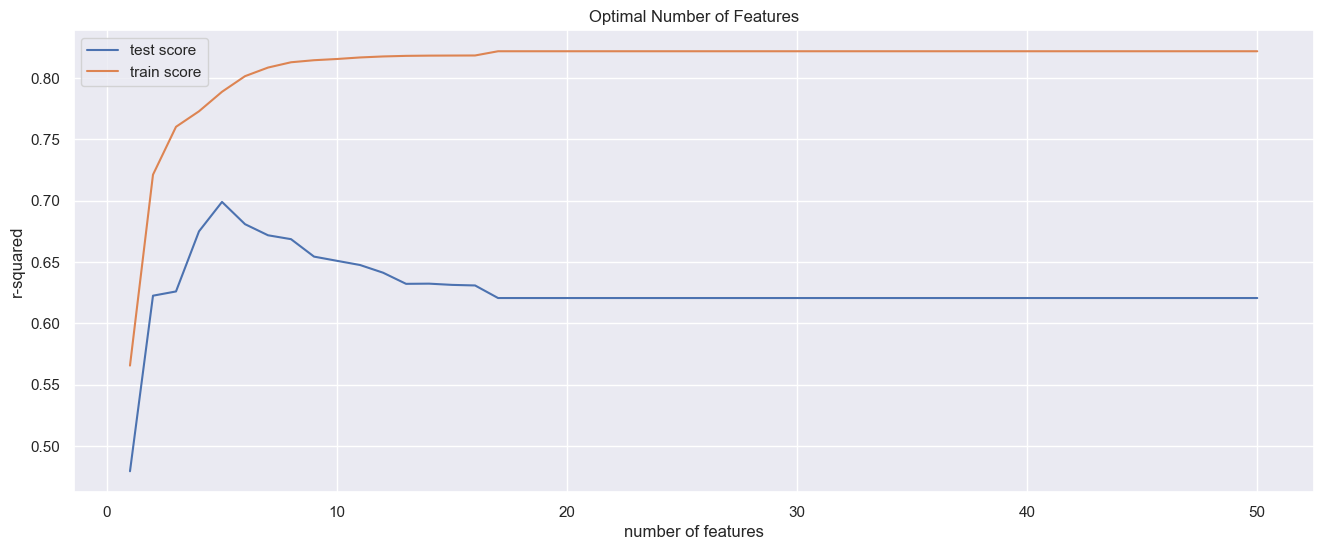

In [91]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(result["param_n_features_to_select"], result["mean_test_score"])
plt.plot(result["param_n_features_to_select"], result["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [92]:
optimal_linear_pred = model_cv.predict(X_test)
optimal_linear_pred 

array([204.51275939, 207.07287694, 193.24267605, 222.20148314,
       178.53343883, 201.48526219, 225.55574778, 214.08746859,
       202.99527616, 209.14197885, 173.79491713, 181.50181117])

In [93]:


print('Optimal Linear MSE:', metrics.mean_squared_error(y_test, optimal_linear_pred))
print('Optimal Linear RMSE:', np.sqrt(metrics.mean_squared_error(y_test, optimal_linear_pred)))
print('Optimal Linear Training Absolute:', metrics.mean_absolute_error(y_test, optimal_linear_pred))

Optimal Linear MSE: 76.96686070752145
Optimal Linear RMSE: 8.773075897740851
Optimal Linear Training Absolute: 5.24318004301455


Moving on to ridge regression as the absolute error and MSE are still too high. The goal is to drive downt the absolute error so that there isn't too much variance between actual numbers and predicted values.

## Ridge Regression

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [95]:
ridge_reg_pred =ridge_reg.predict(X_test)
ridge_reg_pred

array([202.83025136, 205.09063173, 192.14059141, 221.91585071,
       176.87083467, 205.33206437, 226.3387442 , 221.95810298,
       203.09460552, 211.28513427, 174.62957133, 181.05833159])

In [96]:
print("Test MSE:", metrics.mean_squared_error(y_test, ridge_reg_pred))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridge_reg_pred)))
print("Test Absolute:", metrics.mean_absolute_error(y_test, ridge_reg_pred))

Test MSE: 81.22219005116538
Test RMSE: 9.012335438229393
Test Absolute: 5.963967780177794


### Ridge Regression (First Iteration)

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()
# defining cross validation folds as 5
folds = 5

In [98]:

grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
prediction_ridge =grid_cv_model.predict(X_test)
prediction_ridge

array([202.19875027, 205.36844871, 191.0027308 , 221.37524489,
       176.89685188, 205.26630904, 224.07071909, 222.44637031,
       203.38603507, 210.53893765, 176.42374802, 183.22092829])

#### Ridge Repression(First Iteration) Perfomance Evaluation

In [100]:

print("Ridge Regression MSE(alpha=1000):", metrics.mean_squared_error(y_test, prediction_ridge))
print("Ridge Regression RMSE(alpha=1000):", np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge)))
print("Ridge Regression Absolutealpha=1000):", metrics.mean_absolute_error(y_test, prediction_ridge))

Ridge Regression MSE(alpha=1000): 75.31463410542327
Ridge Regression RMSE(alpha=1000): 8.67840043472432
Ridge Regression Absolutealpha=1000): 5.8424438697914125


Here we can see much better performance compared to the linear regression. The linear Regression had a mean squared error of 109.4 and the ridge regression has a mean squared error of 51.7. There is a decrease in the MSE which shows that the ridge regression model performing better than the linear. Finally, we see that Linear Regression had an absolute error of 8.2 which means that our standard deviation +8.2 or -8.2. To put this in a real world context if the linear model predicts a score of 200 then the actual score could be 208.2 or 191.8. However with the Ridge Regressor, we have an absolute error of 4.9 so prediction scores in that scenario would be more like 195.1 -204.9. Ultimately a smaller absolute error means more accurate predictions.

In [101]:
grid_cv_model.best_params_


{'alpha': 1000}

This simply means that our performance evaluation is based on an alpha of 1000. I will re-run this regressor using alternate alpha values to see how this can lower our absolute error.

### Ridge Regression (Second Iteration)

In [102]:
#seting alpha as 20
alpha = [1000, 2000,3000, 4000,5000,6000,7000,8000,9000]

# Initialising Ridge() with above alpha
ridge =Ridge()
parameters2 = {'alpha': [1000, 2000,3000, 4000,5000,6000,7000,8000,9000]}

#GridSearchCV. This will allow us to automatically perform 5-fold cross-validation
# with a range of different regularization parameters in order to find the optimal value of alpha.
ridge2 = GridSearchCV(ridge, parameters2,scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge2.fit(X_train,y_train)




GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1000, 2000, 3000, 4000, 5000, 6000, 7000,
                                   8000, 9000]},
             scoring='neg_mean_squared_error')

In [103]:
print("Ridge best alpth value ",ridge2.best_params_)

Ridge best alpth value  {'alpha': 6000}


In [104]:
optimal_ridge = Ridge(alpha=9000)
optimal_ridge.fit(X_train, y_train)

Ridge(alpha=9000)

In [105]:
optimal_ridge_pred =optimal_ridge.predict(X_test)
optimal_ridge_pred

array([199.93774491, 204.81402143, 190.92529465, 216.94286052,
       178.84440017, 207.1082263 , 220.37874814, 220.65760549,
       202.92737082, 211.49150014, 181.15663888, 190.58509766])

#### Ridge Repression(Second Iteration) Perfomance Evaluation

In [106]:

print("Optimal Ridge MSE(alpha=9000):", metrics.mean_squared_error(y_test,optimal_ridge_pred))
print("Optimal Ridge RMSE(alpha=9000):", np.sqrt(metrics.mean_squared_error(y_test, optimal_ridge_pred)))
print("Optimal Ridge Absolute(alpha=9000):", metrics.mean_absolute_error(y_test, optimal_ridge_pred))

Optimal Ridge MSE(alpha=9000): 70.30573588682206
Optimal Ridge RMSE(alpha=9000): 8.384851572140205
Optimal Ridge Absolute(alpha=9000): 6.698974817432062


### Ridge Regression (Third Iteration)

In [107]:

alpha = [18,19,20,25,30,35,40,45,50,55,60]

# Initialising Ridge() with above alpha
ridge =Ridge()
parameters3 = {'alpha': [1000, 3000, 6000, 9000, 12000, 20000]}

#GridSearchCV. This will allow us to automatically perform 5-fold cross-validation
# with a range of different regularization parameters in order to find the optimal value of alpha.
ridge3 = GridSearchCV(ridge, parameters3,scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1000, 3000, 6000, 9000, 12000, 20000]},
             scoring='neg_mean_squared_error')

In [108]:
print("Ridge best alpth value ",ridge3.best_params_)

Ridge best alpth value  {'alpha': 6000}


In [109]:
optimal_ridge2 = Ridge(alpha=20000)
optimal_ridge2.fit(X_train, y_train)

Ridge(alpha=20000)

In [110]:
optimal_ridge_pred2 =optimal_ridge2.predict(X_test)
optimal_ridge_pred2

array([198.88305651, 204.32674499, 191.61233079, 213.8343949 ,
       180.45719687, 207.97118588, 218.93799296, 218.90544976,
       202.47505087, 212.31942778, 183.21595189, 194.1884925 ])

#### Ridge Repression(Third Iteration) Perfomance Evaluation

In [111]:
print("Optimal Ridge MSE (alpha=20000):", metrics.mean_squared_error(y_test,optimal_ridge_pred2))
print("Optimal Ridge RMSE (alpha=20000):", np.sqrt(metrics.mean_squared_error(y_test, optimal_ridge_pred2)))
print("Optimal Ridge Absolute(alpha=20000)", metrics.mean_absolute_error(y_test, optimal_ridge_pred2))

Optimal Ridge MSE (alpha=20000): 76.41228298377283
Optimal Ridge RMSE (alpha=20000): 8.741411955958421
Optimal Ridge Absolute(alpha=20000) 7.301154843021372


### Lasso Regression

In [112]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [113]:
lasso_pred =lasso_reg.predict(X_test)
lasso_pred

array([202.49567368, 205.42180141, 192.06889575, 221.97168565,
       177.07768239, 204.8999655 , 225.23230274, 221.9408336 ,
       203.2893432 , 210.69084767, 174.94831637, 181.47667939])

In [114]:
print("Optimal Ridge MSE:", metrics.mean_squared_error(y_test,lasso_pred))
print("Optimal Ridge RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print("Optimal Ridge Absolute:", metrics.mean_absolute_error(y_test, lasso_pred))

Optimal Ridge MSE: 79.48179712781588
Optimal Ridge RMSE: 8.915256425241838
Optimal Ridge Absolute: 5.8555029606343565


As of right now, the ridge regression shows the most promise with error values being within acceptable measures. With that being said, I will move on to ensemble learning to see performance can be improved.

## Decision Tree Regression

In [115]:
from sklearn.tree import DecisionTreeRegressor


dgr = DecisionTreeRegressor(random_state=42)
dgr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [116]:

dgr_pred = dgr.predict(X_test)
dgr_pred

array([202., 219., 205., 233., 202., 195., 222., 220., 203., 209., 169.,
       155.])

In [117]:
from sklearn.metrics import mean_squared_error
dec_tree_MSE = round(metrics.mean_squared_error(y_test, dgr.predict(X_test)),4)
dec_tree_RMSE =np.sqrt(metrics.mean_squared_error(y_test, dgr.predict(X_test)))
dec_absolute = metrics.mean_absolute_error(y_test, dgr.predict(X_test))

print("Decision Tree MSE", dec_tree_MSE)
print("Decision Tree RMSE", dec_tree_RMSE)
print("Decision Tree Absolute Error", dec_absolute)

Decision Tree MSE 250.25
Decision Tree RMSE 15.819292019556375
Decision Tree Absolute Error 12.75


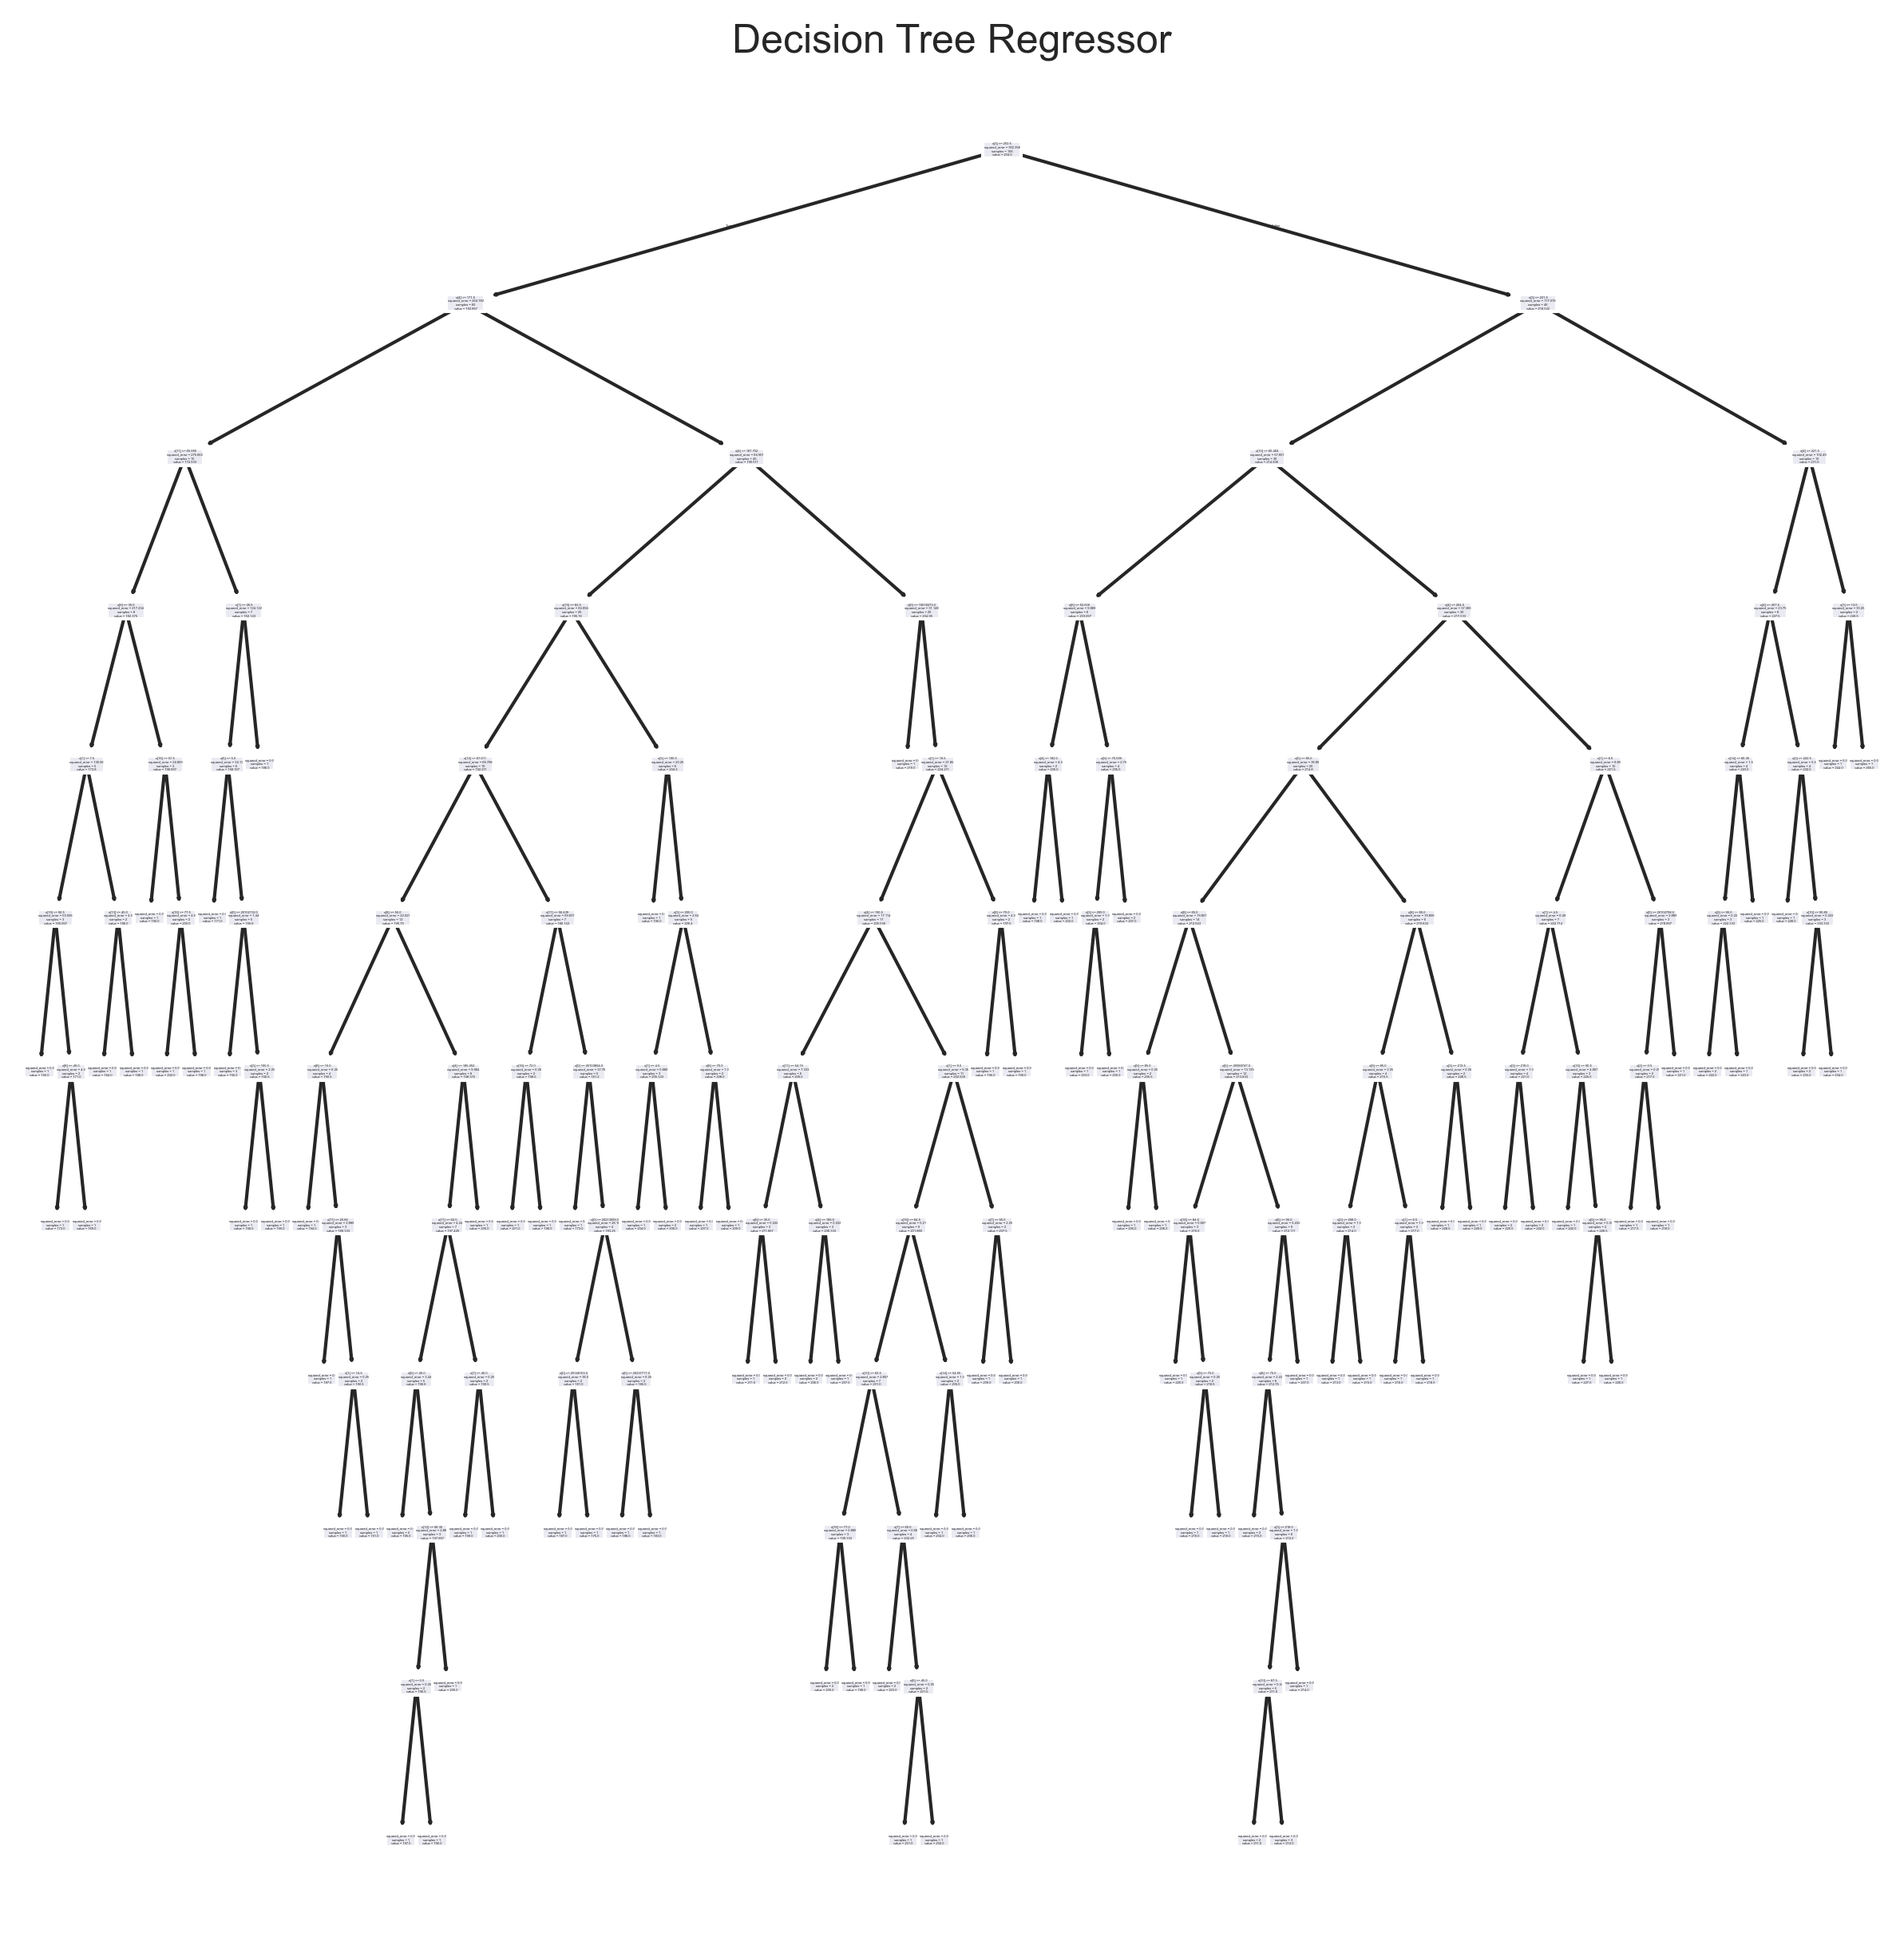

In [118]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10), dpi =300)
tree.plot_tree(dgr)
plt.title('Decision Tree Regressor')
plt.show()

### Decision Tree Grid Search (Second Iteration)

In [119]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----
dec_tree = DecisionTreeRegressor(random_state=42)
# Define the parameter grid
param_grid_dec1 = {
    'splitter': ["best", "random"],
    'min_samples_split': [5,10,15,20,25,30,35,40,45,50,55],
    'max_depth': [3, 4, 5, 6,7,8,9,10],
}
# Perform grid search
grid_search = GridSearchCV(estimator= dec_tree, param_grid=param_grid_dec1, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model_dec1 = grid_search.best_params_
best_model_dec1

/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 6, 'min_samples_split': 20, 'splitter': 'random'}

In [120]:
optimal_dec= DecisionTreeRegressor(max_depth=4,min_samples_split=40, splitter='best', random_state=42)
optimal_dec.fit(X_train, y_train)
optimal_dec_pred =optimal_dec.predict(X_test)
optimal_dec_pred

array([214.80555556, 214.80555556, 195.16      , 231.9       ,
       172.93333333, 195.16      , 231.9       , 214.80555556,
       204.95      , 195.16      , 172.93333333, 172.93333333])

In [121]:
optimal_dec_tree_MSE = mean_squared_error(y_test, optimal_dec.predict(X_test))
optimal_dec_tree_RMSE = np.sqrt(metrics.mean_squared_error(y_test, optimal_dec.predict(X_test)))
optimal_dec_tree_Absolute = metrics.mean_absolute_error(y_test, optimal_dec.predict(X_test))

print("Optimal Decision Tree MSE:", optimal_dec_tree_MSE)
print("Optimal Decision Tree RMSE:", optimal_dec_tree_RMSE)
print("Optimal Decision Tree Absolute Error:", optimal_dec_tree_Absolute)

Optimal Decision Tree MSE: 119.26828271604937
Optimal Decision Tree RMSE: 10.921001909900454
Optimal Decision Tree Absolute Error: 8.165555555555555


Based on first iteration changes, we see that we reduced the mean squared error of our model from 223 to 58.2. We can also see improved performance in our absolute error which was reduced from 10.7 to 6.3. I will continue to tune various pramaters to see if I can get better results.

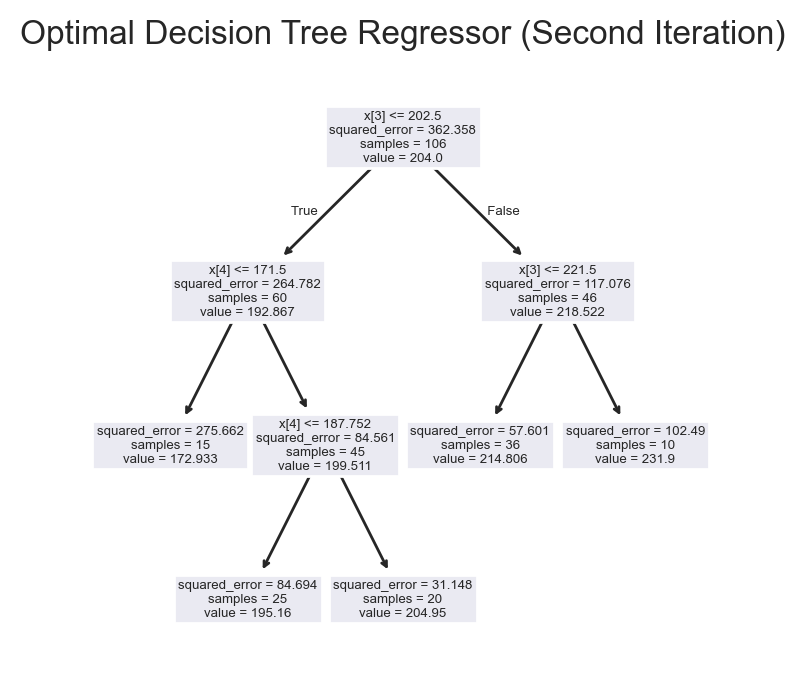

In [122]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 200)
tree.plot_tree(optimal_dec)
plt.title('Optimal Decision Tree Regressor (Second Iteration)')
plt.show()

### Decision Tree Grid Search (Third Iteration)

In [123]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----
dec_tree = DecisionTreeRegressor(random_state=42)
# Define the parameter grid
param_grid_dec2 = {
    'splitter': ["best", "random"],
    'min_samples_split': [35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
    'max_depth': [2,3,4,5,6],
}
# Perform grid search
grid_search_second = GridSearchCV(estimator= dec_tree, param_grid=param_grid_dec2, cv=5, n_jobs=-1)
grid_search_second.fit(X_train, y_train)

# Get the best model
best_model_dec2 = grid_search_second.best_params_
best_model_dec2

/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 4, 'min_samples_split': 35, 'splitter': 'random'}

In [124]:
optimal_dec2=DecisionTreeRegressor(max_depth=4,min_samples_split=41, splitter='best', random_state=42)
optimal_dec2.fit(X_train, y_train)
optimal_dec2_pred =optimal_dec2.predict(X_test)
optimal_dec2_pred

array([214.80555556, 214.80555556, 195.16      , 231.9       ,
       172.93333333, 195.16      , 231.9       , 214.80555556,
       204.95      , 195.16      , 172.93333333, 172.93333333])

In [125]:
optimal_dec2_tree_MSE = mean_squared_error(y_test, optimal_dec2.predict(X_test))
optimal_dec2_tree_RMSE = np.sqrt(metrics.mean_squared_error(y_test, optimal_dec2.predict(X_test)))
optimal_dec2_tree_Absolute = metrics.mean_absolute_error(y_test, optimal_dec2.predict(X_test))

print("Optimal MSE(Third Iteration):", optimal_dec2_tree_MSE)
print("Optimal RMSE(Third Iteration):", optimal_dec2_tree_RMSE)
print("Optimal Absolute Error(Third Iteration):", optimal_dec2_tree_Absolute)

Optimal MSE(Third Iteration): 119.26828271604937
Optimal RMSE(Third Iteration): 10.921001909900454
Optimal Absolute Error(Third Iteration): 8.165555555555555


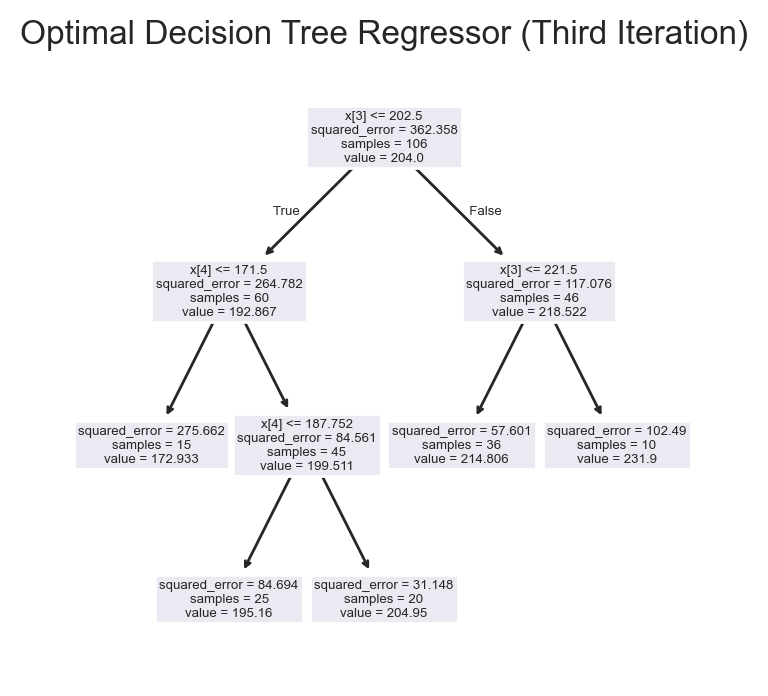

In [126]:

from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 200)
tree.plot_tree(optimal_dec2)
plt.title('Optimal Decision Tree Regressor (Third Iteration)')
plt.show()

After additional changes to model parameters, I'm convinced that best parameters have been reached using the decision tree model. The plan will be to move forward with ensemble learning techniques to see if increased performance and results can be achienved.

## Gradient Boost Regresson

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [128]:
gbr_pred =gbr.predict(X_test)
gbr_pred

array([197.40473284, 209.15311352, 194.14579962, 208.41507226,
       180.62542962, 200.56873129, 219.5178707 , 213.11668712,
       206.5683462 , 209.7191245 , 178.32494175, 162.1863601 ])

In [129]:

gbr_MSE = mean_squared_error(y_test, gbr.predict(X_test))
gbr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, gbr.predict(X_test)))
gbr_Absolute = metrics.mean_absolute_error(y_test, gbr.predict(X_test))

print("Gradient Boost MSE:", gbr_MSE)
print("Gradient Boost RMSE:", gbr_RMSE)
print("Gradient Boost Absolute Error:", gbr_Absolute)

Gradient Boost MSE: 112.43224637404164
Gradient Boost RMSE: 10.603407300205046
Gradient Boost Absolute Error: 7.801599366914705


Based on the first iteration of the Gradient Boost techniuqe, we see that the Mean Square Error was reduced from 58.2(Optimal Decision Tree Results) to 38.6(Gradient Boost). We can aslo see this in the absolute error that was reduced from 6.4(Optimal Decision Tree Results) to 4.79(Gradient Boost).

### Gradient Boost (Second Iteration)

In [130]:

# Initialize the model
gbr_new = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid_gbr = {
    'n_estimators': [80,90,100,125,150], # Re-run using smaller estimators
    'learning_rate': [0.01, 0.1, 0.2, 1, 1.5, 2],
    'max_depth': [3, 4, 5, 6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [1,2,3,4,5]
}
# Perform grid search
grid_search = GridSearchCV(estimator=gbr_new, param_grid=param_grid_gbr, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model_gbr = grid_search.best_params_

best_model_gbr

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [131]:
optimal_gbr = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=150, min_samples_leaf=1,min_samples_split=4)
optimal_gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=4,
                          n_estimators=150)

In [132]:
optimal_gbr_pred=optimal_gbr.predict(X_test)
optimal_gbr_pred

array([199.53825134, 206.66727154, 196.72519897, 213.96728187,
       184.5610992 , 201.84382091, 219.53446318, 210.6785504 ,
       204.21355719, 206.11777913, 181.60290162, 174.66490856])

In [133]:
optimal_gbr_MSE = mean_squared_error(y_test, optimal_gbr.predict(X_test))
optimal_gbr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, optimal_gbr.predict(X_test)))
optimal_gbr_Absolute = metrics.mean_absolute_error(y_test, optimal_gbr.predict(X_test))

print("Optimal Gradient Boost MSE(Second Iteration):", optimal_gbr_MSE)
print("Optimal Gradient Boost RMSE(Second Iteration):", optimal_gbr_RMSE)
print("Optimal Gradient Boost Absolute Error(Second Iteration):", optimal_gbr_Absolute)

Optimal Gradient Boost MSE(Second Iteration): 63.07083093833546
Optimal Gradient Boost RMSE(Second Iteration): 7.94171460947417
Optimal Gradient Boost Absolute Error(Second Iteration): 5.853556062665933


### Gradient Boost (Third Iteration)

In [134]:

# Initialize the model
gbr_new = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid_gbr2 = {
    'n_estimators': [140,145,150,155,160], # Rerun using smaller estimators
    'learning_rate': [0.00001, 0.001, 0.01, 0.1],
    'max_depth': [1,2,3,4],
    'min_samples_split': [3,4,5,6,7],
    'min_samples_leaf': [1,2,3]
}
# Perform grid search
grid_search2 = GridSearchCV(estimator=gbr_new, param_grid=param_grid_gbr2, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search2.fit(X_train, y_train)

# Get the best model
best_model_gbr2 = grid_search2.best_params_

best_model_gbr2

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 145}

In [135]:
optimal_gbr2 = GradientBoostingRegressor(learning_rate=0.1, max_depth=1, n_estimators=140, min_samples_split=3,min_samples_leaf=1)
optimal_gbr2.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, min_samples_split=3, n_estimators=140)

In [136]:
optimal_gbr_pred =optimal_gbr2.predict(X_test)
optimal_gbr_pred

array([199.7206989 , 204.70534867, 193.65427356, 211.11427284,
       184.72766894, 204.5318645 , 220.54600513, 215.69469313,
       206.2475948 , 211.05925022, 177.43681718, 180.76127216])

In [137]:
optimal_gbr2_MSE = mean_squared_error(y_test, optimal_gbr2.predict(X_test))
optimal_gbr2_RMSE = np.sqrt(metrics.mean_squared_error(y_test, optimal_gbr2.predict(X_test)))
optimal_gbr2_Absolute = metrics.mean_absolute_error(y_test, optimal_gbr2.predict(X_test))

print("Optimal GBR MSE(Third Iteration):", optimal_gbr2_MSE)
print("Optimal GBR RMSE(Third Iteration):", optimal_gbr2_RMSE)
print("Optimal GBR Absolute Error(Third Iteration):", optimal_gbr2_Absolute)

Optimal GBR MSE(Third Iteration): 80.50310174135903
Optimal GBR RMSE(Third Iteration): 8.972352074086205
Optimal GBR Absolute Error(Third Iteration): 6.4817665397276985


These changes didn't provide better results compared to the first iteration. At this point, the initial iteration provided the best results with an absolute error of 4.7. I will continue to work to reduce this value.

## Random Forest Regression

In [138]:
from sklearn.ensemble import RandomForestRegressor
rnd_for = RandomForestRegressor(random_state=42)
rnd_for.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [139]:
rnd_for_pred =rnd_for.predict(X_test)
rnd_for_pred

array([200.46, 203.15, 194.8 , 219.08, 181.92, 199.83, 219.18, 216.06,
       204.32, 208.64, 179.67, 176.11])

In [140]:
rnd_MSE = mean_squared_error(y_test, rnd_for.predict(X_test))
rnd_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rnd_for.predict(X_test)))
rnd_Absolute = metrics.mean_absolute_error(y_test, rnd_for.predict(X_test))

print("Random Forest MSE:", rnd_MSE)
print("Random Forest  RMSE:", rnd_RMSE)
print("Random Forest  Absolute Error:", rnd_Absolute)

Random Forest MSE: 66.91539999999996
Random Forest  RMSE: 8.180183372027791
Random Forest  Absolute Error: 6.084999999999994


### Random Forest Grid Search (Second Iteration)

In [141]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

# Initialize the model
rand_for_new = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_rnd2 = {
    'n_estimators': [25,50, 100, 200, 300],# Rerun using different estimators
    'min_samples_split': [2, 3, 4, 5],
    'max_depth': [3, 4, 5, 6],#Play with these values as well. Consider using larger depth values
}

# Perform grid search
grid_search2 = GridSearchCV(estimator=rand_for_new, param_grid=param_grid_rnd2, cv=5, n_jobs=-1)
grid_search2.fit(X_train, y_train)

# Get the best model
best_model_rnd2 = grid_search2.best_params_
best_model_rnd2

{'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 50}

In [142]:
optimal_rnd2 = RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=300)
optimal_rnd2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=300)

In [143]:
optimal_rnd_pred2 =optimal_rnd2.predict(X_test)
optimal_rnd_pred2

array([201.89092565, 204.52628228, 196.46462429, 218.58286174,
       181.42685151, 201.22118506, 219.83410007, 215.47159488,
       203.46296428, 206.06689635, 179.33522964, 180.73051413])

In [144]:
rnd_MSE2 = mean_squared_error(y_test, optimal_rnd2.predict(X_test))
rnd_RMSE2 = np.sqrt(metrics.mean_squared_error(y_test, optimal_rnd2.predict(X_test)))
rnd_Absolute2 = metrics.mean_absolute_error(y_test, optimal_rnd2.predict(X_test))

print("Random Forest MSE(Second Iteration):", rnd_MSE2)
print("Random Forest  RMSE (Second Iteration):", rnd_RMSE2)
print("Random Forest  Absolute Error(Second Iteration):", rnd_Absolute2)

Random Forest MSE(Second Iteration): 59.221361396749074
Random Forest  RMSE (Second Iteration): 7.695541657138182
Random Forest  Absolute Error(Second Iteration): 5.114806986654027


### Random Forest Grid Search (Third Iteration)

In [145]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

# Initialize the model
rand_for_new = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_rnd3 = {
    'n_estimators': [300,325,350,400,425],# Rerun using different estimators
    'min_samples_split': [5,6,7,8,9,10],
    'max_depth': [1,2,3,4,5,6,7],#Play with these values as well. Consider using larger depth values
}

# Perform grid search
grid_search_rnd3 = GridSearchCV(estimator=rand_for_new, param_grid=param_grid_rnd3, cv=5, n_jobs=-1)
grid_search_rnd3.fit(X_train, y_train)

# Get the best model
best_model_rnd3= grid_search_rnd3.best_params_
best_model_rnd3

/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 400}

In [146]:
optimal_rnd3 = RandomForestRegressor(max_depth=2, min_samples_split=9, n_estimators=400)
optimal_rnd3.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, min_samples_split=9, n_estimators=400)

In [147]:
optimal_rnd_pred3 =optimal_rnd3.predict(X_test)
optimal_rnd_pred3

array([202.81038338, 205.52706831, 198.93315659, 218.05694876,
       181.40151494, 201.62134764, 219.01982564, 216.35222313,
       201.91432437, 204.92460934, 178.49481376, 183.35529364])

In [148]:
rnd_MSE3 = mean_squared_error(y_test, optimal_rnd3.predict(X_test))
rnd_RMSE3 = np.sqrt(metrics.mean_squared_error(y_test, optimal_rnd3.predict(X_test)))
rnd_Absolute3 = metrics.mean_absolute_error(y_test, optimal_rnd3.predict(X_test))

print("Random Forest MSE(Third Iteration):", rnd_MSE3)
print("Random Forest  RMSE (Thirf Iteration):", rnd_RMSE3)
print("Random Forest  Absolute Error(Third Iteration):", rnd_Absolute3)

Random Forest MSE(Third Iteration): 62.83810489728754
Random Forest  RMSE (Thirf Iteration): 7.927048940008352
Random Forest  Absolute Error(Third Iteration): 5.556072258690544


# Final Model Selection 

In [149]:
final_model =model_cv
final_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=18 > n_features=17. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=18 > n_features=17. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=18 > n_features=17. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=18 > n_features=17. There will be no feature selection and all features wil

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [150]:
final_model_pred= final_model.predict(X_test)

## Final Model Performance

In [151]:
print("Final Model MSE:", metrics.mean_squared_error(y_test,final_model_pred))
print("Final Model RMSE:", np.sqrt(metrics.mean_squared_error(y_test, final_model_pred)))
print("Final Model Absolute Error:", metrics.mean_absolute_error(y_test, final_model_pred))

Final Model MSE: 76.96686070752145
Final Model RMSE: 8.773075897740851
Final Model Absolute Error: 5.24318004301455


I after running several iteratative grid seraches of each model, I've determined that the model best fits data is the ridge regression. This presents the lowest absolute error and reasonable mean squred error compared to all other models. At this point, of the project we are ready to move forward with deployment.

In [152]:
import joblib
# Save the model to a file
model_filename = 'Linear_model.pkl'
joblib.dump(final_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as Linear_model.pkl


In [153]:
# Load the model from the file
loaded_model = joblib.load(model_filename)

In [154]:
loaded_model_predictions = loaded_model.predict(X_test)

In [155]:
loaded_model_predictions

array([204.51275939, 207.07287694, 193.24267605, 222.20148314,
       178.53343883, 201.48526219, 225.55574778, 214.08746859,
       202.99527616, 209.14197885, 173.79491713, 181.50181117])

In [156]:
X.iloc[1]

StudentId                    2.010586e+07
Absence                      1.000000e+00
Suspended                    0.000000e+00
Previous Year Final Score    1.989167e+02
Diagnostic                   1.940000e+02
Quarter 1 Assessment 1       6.000000e+01
Quarter 1 Assessment 2       2.000000e+01
Quarter 1 Assessment 3       3.000000e+01
Quarter 1 Assessment 4       4.000000e+01
Quarter 1 Assessment 5       7.000000e+01
Quarter 2 Assessment 1       6.670000e+01
Quarter 2 Assessment 2       5.000000e+01
Quarter 2 Assessment 3       4.170000e+01
Quarter 2 Assessment 4       7.000000e+01
Quarter 2 Assessment 5       5.861034e+01
Quarter 1 Grade              7.800000e+01
Quarter 2 Grade              7.800000e+01
Name: 1, dtype: float64

In [157]:
loaded_model.predict(np.array(X.iloc[0]).reshape(1,-1))

/Users/jerfsondelphonse/anaconda3/envs/ML_ENV/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


array([159.64141439])

In [158]:
y[0]

np.float64(155.0)

In [159]:
# pd.set_option('display.max_columns', None)
# features